# **Pictographic Time-Travel: Deciphering Ancient Chinese Script with Modern Day Doodles**
## **RQ: How do models trained on Google Quick, Draw! images generalize to the out-of-distribution Oracle Bone Script dataset?**
*Vipasha Goyal, Luiza Yuan, Wieger Scheurer*

Welcome to our project!

To access the Quick, Draw! as well as the Oracle Bone Script datasets, please use the link to the [Google Drive Folder](https://drive.google.com/drive/folders/1nJxpzrK6MH4BcW7mo2ADEWFEh0lQE-np?usp=share_link) and add the folder to your own Google Drive.

You can do this by clicking on the top-right corer of the folder. From there, select "Organize" from the dropdown menu and choose "Add shortcut to Drive." This automatically shares all the necessary files to replicate this project without the hassle of having to download individual files (some of which, such as the Google Quick, Draw! dataset, can be very large)!

### ***Tabel of contents***

1. **Background and Introduction**
2. **Methods: Data, Model, and Training**
3. **Results and Analyses**
4. **Discussion and Concluding Remarks**

### **Background and introduction**
**In this project we try out a fun take on out-of-distribution generalization!**

We will build our own Multilayer Perceptron (MLP) and Convolutional Neural Network (CNN) to explore whether we can use a model trained on Google Quick, Draw! images to decipher an ancient form of Chinese writing: Oracle Bone Script!



---



#### ***Out-of-distribution generalization problem***
Traditionally, deep neural network (DNN) models are trained with the assumption that the same, or similar, statistical distribution underlies both the training and test data. This is termed the Independent and Identically Distributed (i.i.d.) assumption (Gwon & Yoo, 2023), and sometimes also referred to as the closed-world assumption. Put simply, the test data is assumed to be drawn independently and "in-distribution" (ID).

However, once deployed in the real-world, the assumption is often violated. Out-of-distribution (OOD) data are drawn from statistical patterns the classifier has not been trained to recognize, leading to obvious performance degradation and lowered dependability of the model (Liu et al., 2023). In the unpredictable realm of real-world data and application, how does the model make decisions when it faces unusual inputs that it had previously not encountered during training? The OOD generalization problem as well as OOD detection have thus recently received increased attention from within the research community, as avenues to address growing issues related to the reliability and safety of DNN's in real-world applications.

Attention on OOD detection has given rise to a diverse array of methods, ranging from classification-based to density-based and distance-based approaches (Yang et al., 2022). Additionally, methods such as manipulation of feature statistics (Li et al., 2022), removal of spurious correlations between features (Zhang et al., 2021), and novel data augmentation techniques (Hendrycks et al., 2021; Gwon & Yoo, 2023) have been proposed to improve OOD generalization.

### ***Project idea***
Oracle Bone Scripts (甲骨文) are the oldest form of Chinese writing, recorded as early as late 2000 BC (around 3,300 years ago!). The scripts are found on animal bones and turtle shells used in ceremonies (hence the name "Oracle Bone Scripts") and form the basis from which modern Chinese characters developed (Wang et al., 2022).

![Chinese character evolution.png](https://drive.google.com/uc?export=view&id=1EMRgXakWxUQhZv5wwW7N7EQ7yzBPoAZW)

Many of the script characters are motivated by the objects they represent and are hence visual "hieraglyphic" or "pictorial" representations. Some of them are surprisingly easy to recognize and can look strikingly similar to how we would perhaps draw objects today, such as the examples for the character "turtle" below.

![Screen Shot 2023-12-21 at 10.35.05 PM.png](https://drive.google.com/uc?export=view&id=1MfAXp9gmffUkGPc0GIz8sjri6nI6X17A)
However, how similar are they really to representations people would draw nowadays? **Can we use modern day doodles to help us decipher these ancient Oracle Bone Scripts?**

In our project, we want to figure out to what extent a model trained on modern day doodles could generalize to and succesfully classify an out-of-distribution test set of Oracle Bone Scripts. To do this, we build a multilayer perceptron (MLP) as the base model and subsequently add convolutional layers to also build our own customized Convolutional Neural Network (CNN). Next, we train both the MLP and the CNN solely on doodle images from the Google Quick, Draw! dataset and evalute both models' performance on the Oracle Bone Scripts dataset. Then, we pick the better model (expected to be the CNN) and further analyze the out-of-distribution image classifcation results. Lastly, we summarize what we haev learned and suggest some future ideas.


### **Setting up the notebook**
Before we begin, we have to first import some standard and third-party libraries. We also want to mount Google Drive here in colab so that we can easily import the files needed for the project.

### ***Importing libraries***
We import some helper libraries, including standard packages for data processing such as numpy and matplotlib for visualization. Since we are working with images, we also import specialized libraries for image processing, such as PIL. Lastly, we import libraries for DNN's, such as sklearn.model_selection and pytorch.

### ***Defining the directory***
We mount Google Drive in the notebook so that we can easily import the necessary files for the project.


In [ ]:
# Import helper libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
from io import BytesIO # Use When expecting bytes-like objects
import pickle
from collections import OrderedDict
import os
from os import path
import ast
import random
from pprint import pprint
from google.colab import drive, files

# import matplotlib for visualization
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# import PIL for image manipulation
from PIL import Image, ImageDraw, ImageOps
from IPython.display import Image as Imgdip
from IPython.display import display


# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import pytorch
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# import cv2 module from OpenCV
import cv2

In [ ]:
# Define directory
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## **Methods**
### ***Google Quick, Draw!***
The Google Quick,Draw! Dataset offers a rich collection of hand-drawn images (doodles) sourced from the [Quick, Draw! game platform](https://quickdraw.withgoogle.com), an interative game platform where players are prompted to illustrate various objects like "tiger", "campfire", and more within a constrained timeframe (20 seconds).

Comprising a vast pool of 50 million drawings distributed across 345 distinct categories, . Unlike some datasets limited to singular sources, this dataset stands out for its expansive variety, with drawings collected from over 15 milllion players from across the world.

Each sketch accompanied by timestamped vectors and metadata detailing the drawing prompt and the player's location by country. With its extensive diversity and breadth of categories, this dataset offers a unique opportunity for exploring and understanding the nuances of drawn imagery.

### ***Oracle Bone Script***
The Oracle Bone Script dataset was sourced via [Github](https://github.com/cuicaihao/deep-learning-for-oracle-bone-script-recognition ) from a project uses CNN to translate Oracle Bone Script to modern Chinese characters and builds a Graphical User Interface that users can interact with.

The dataset contains 1,602 50x50 JPEG images of Oracle Bone Script lifted from carvings. Each image is labeled with their modern Chinese character counterpart.






### **Reading-in datasets & creating overlapping categories**
First we load in the [csv file](https://drive.google.com/file/d/1ngZsP1p08PjXjxpO-m37vL0MAWK33WJ1/view?usp=sharing) containing the modern Chinese characters corresponding with the Oracle Bone Scripts. Specifically, in the [original dataset](https://drive.google.com/file/d/1QfdXatAqoz5P6okJ2iuPfH1JBw5PzFjg/view?usp=sharing), each of the Oracle Bone Scripts images were labelled with their modern Chinese counterparts.

In order to test whether a model trained on the Quick, Draw! dataset could recognize data that significantly differs from this training set, we manually matched the 1,602 Orable Bone Script images to the Google Quick, Draw! categories using their modern Chinese character labels. For example, the modern Chinese character「虎」(tiger) is matched with the Quick, Draw! category "tiger".

For manually re-labeling the Orable Bone Script images using their original modern Chinese labels, a few steps were taken. First, only nouns were translated from Chinese to English, from which only nouns of objects were selected (since Quick, Draw! categories consisted solely of objects). Next, we matched the translated objects to their corresponding Quick, Draw! categories. For matches that are precisely overlapping (e.g. "ear"「耳」 to "ear" or "mountain"「山」to "mountain"),we re-labeled the Oracle Bone Script images with the overlapping Quick, Draw! categories. We considered including semantically related or ambiguous matches (e.g. "mountain peak"「夆」 to "mountain"; "forest"「森」to "tree" or "shore, riverbank"「湄」to "beach"), but ultimately decided against it. Exception was made if the Quick, Draw! category semantically emcompassed the translated object from Oracle Bone images (e.g. "cedar" 「杉」or "apple tree" 「柰」were labeled as the Quick, Draw! category "tree"). Pairs with the opposite relation, where the Quick, Draw! category was more specific than the translated object, were excluded (e.g. "bean" 「豆」to the Quick, Draw! category "string bean").

Here below, we create the final list of overlapping categories that will be used to select the final subset of images from both the Google Quick, Draw! and the Oracle Bone Script datasets that we will work with in this project.


After manually matching the Oracle Bone Script images to Quick, Draw! categories, we ended up with a total of 53 overlapping categories.

We decided to limit the final choice of categories to a reasonable number, so that we give our models a better shot at a good performance! This also helps reduce the need for computational power, as we do train our own CNN later on.

**In the end, we decided to select the 15 categories that have the most images per category in the Oracle Bone Script dataset** (which will be used as the test set for OOD generalization). Since some categories in the Oracle Bone Script dataset had very few images (some only had one), by selecting categories that have higher number of images, test accuracy can be averaged across multiple images, instead of calculated from just one or two images.

In [ ]:
# Load in the csv file containing the Oracle Bone Script characters and their English translations
testdat = pd.read_csv("/content/drive/MyDrive/DLiP/Final_OB_labels_EN.csv")

# Select the Oracle Bone Script categories that match the categories of the Quick, Draw! dataset by Google.
value_counts = testdat['matched name'].dropna().value_counts()

# Exclude semantically ambiguous categories (marked with "?")
no_questionmrks = [item for item in value_counts.index if not pd.Series(item).str.contains(r'\?', na=False).any()]

# Sort categories based on the number of images they contain
sorted_categories = sorted(no_questionmrks, key=lambda x: value_counts[x], reverse=True)

# Select the top 15 categories with the most images
OBcats = sorted_categories[:15]

# Make dictionary with numbers attached.
label_dict = {i + 1: cat for i, cat in enumerate(OBcats)}

The code below reads in the Quick, Draw! data using the categories list created above. Only the images belonging to catetgories present in both Quick, Draw! and the Oracle Bone Script datasets are selected.




In [ ]:
# Select the overlapping categories for the Quick, Draw! and Oracle Bone Script datasets
categories = OBcats

# Load data for each category
classes = {}

# Load in images from the Quick, Draw! dataset using the categories list
for category in categories:
    data = pd.read_csv("/content/drive/MyDrive/DLiP/quickdraw/QD_train_total/" + category + ".csv")
    classes[category] = data

#### ***Transforming both datasets into the same format***

Here we create some useful dictionaries to work with the imported data from the Oracle Bone Script dataset later on.

The current format of the data is still relatively 'raw'. The Quick, Draw! images we read in for the projects are stroke-based representations (Cheng et al., 2022). Therefore, we will first have to transform the Oracle Bone Script dataset into the same format as the Quick, Draw!. To do so, we first extract the label data from our ***testdat*** panda dataframe we used to import the .csv file in. Based on this information we iteratively import all the .jpg files we need for the selected categories. This all is stored in a coherent dictionary. Later on the raw image values of the dictionary are replaced by the new stroke-based representations of the images, after running the ***image_to_lines*** function for all the images in the dictionary. In the process, we save different formats of our images, to be able to keep track of the transformation process. These transformations are done to make sure that the Oracle Bone Script images are in the exact same format as the Quick, Draw! images. Minor differences between our datasets would render the probability of acquiring any above-chance out-of-distribution classification accuracy score very unlikely.


In [ ]:
# This is the code to get the data in the right format to start working with it
# It also gives you the list with the .jpg names and all together in a dictionary

picname = {}
pic = {}
pixels = {}
pic_vecs = {}

# Initialize a dictionary to store DataFrames for each category
OBdict = {}

# Initialize a dictionary to store picture names sorted per OBcategory
picname_per_cat = {}

for ind, OBcategory in enumerate(OBcats):
    # Initialize lists for pixel values for the current category
    pixels_category = []
    OBcatvec = np.array((testdat[testdat['matched name'] == OBcats[ind]])['image'])

    # Initialize list to store the picture file names for the current category
    picname_per_cat[OBcategory] = []

    for i in range(len(OBcatvec)):
        picname[i] = OBcatvec[i]
        picname_per_cat[OBcategory].append(picname[i])
        pic[i] = Image.open("/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname[i]).convert('RGB')
        pixels[i] = [
            [list(pic[i].getdata(band=0)),
             list(pic[i].getdata(band=1))]
        ]
        pixels_category.append(pixels[i])

    # Create a Pandas DataFrame for the current category
    df_category = pd.DataFrame({'bonescript': pixels_category})

    # Add the DataFrame to the dictionary
    OBdict[OBcategory] = df_category

# Display the dictionary
for OBcategory, df_category in OBdict.items():
    print(f"\nCategory: {OBcategory}")
    print(df_category)

# Display the dictionary containing picture names sorted per OBcategory
for OBcategory, picnames in picname_per_cat.items():
    print(f"\nCategory: {OBcategory}")
    print(f"Picture Names: {picnames}")


Category: tree
                                           bonescript
0   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
1   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
2   [[[255, 255, 255, 255, 255, 255, 255, 255, 253...
3   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
4   [[[255, 255, 255, 255, 255, 255, 255, 255, 249...
5   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
6   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
7   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
8   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
9   [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
10  [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
11  [[[255, 255, 255, 255, 255, 255, 255, 255, 247...
12  [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
13  [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
14  [[[255, 255, 255, 255, 255, 255, 255, 255, 254...
15  [[[255, 255, 255, 255, 255, 255, 255, 255, 255...
16  [[[255, 255, 255, 255, 255, 255, 255, 255, 250...
17  [[[255, 

Here we define the **image_to_lines** function, which we use to convert the Oracle Bone Script images into the same format as is used in the Quick, Draw! dataset. The black-on-white drawings are reduced to vectors that represent the strokes that make up the image. This way you don't have to represent all the trivial information in an image.

In [ ]:
def image_to_lines(image_path, threshold=210, width=28, depth=28):
    """
    Converts an image into stroke lines and binary representation.
    Args:
        image_path (str) - Path to the image file.
        threshold (int, optional) - Threshold value for image binarization (default is 210).
        width (int, optional) - Width dimension for resizing the image (default is 28).
        depth (int, optional) - Depth dimension for resizing the image (default is 28).

    Returns:
        lines_image (numpy.ndarray) - Binary image with drawn contours representing lines.
        all_strokes (list) - List of stroke data. Each stroke is represented as a list of x and y coordinates.
        raw_image (numpy.ndarray) - Non-binarized representation of the resized image.
    """

    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28
    resized_image = cv2.resize(image, (width, depth))

    # Store the non-binarized version of the resized image
    raw_image = resized_image.copy()

    # Threshold the resized image to create a binary image
    _, binary_image = cv2.threshold(resized_image, threshold, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image using list retrieval mode
    contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank canvas to draw contours
    lines_image = np.zeros_like(binary_image)

    # Draw contours on the blank canvas
    cv2.drawContours(lines_image, contours, -1, (255), thickness=cv2.FILLED)

    # Create a list to store stroke data
    all_strokes = []

    # Store stroke data in the list
    for contour in contours:
        x_coords = contour[:, 0, 0].tolist()
        y_coords = contour[:, 0, 1].tolist()
        all_strokes.append([x_coords, y_coords])

    return lines_image, all_strokes, raw_image


Let's have a look at the way these stroke-representations work as a basis for our images.

These are the raw stroke values, which we will use as basis for our input:  

[[[11, 12, 13, 12], [21, 20, 21, 22]], [[12, 13, 14, 14, 13, 12], [18, 17, 18, 20, 21, 20]], [[11, 12, 13, 12], [9, 8, 9, 10]], [[11, 12, 13, 14, 13, 12], [7, 6, 6, 7, 8, 8]], [[12, 13, 14, 13], [4, 3, 4, 5]], [[13, 12, 13, 9, 10, 11, 10, 9, 11, 12, 12, 11, 11, 12, 12, 11, 11, 10, 10, 13, 14, 14, 13, 14, 13, 12, 11, 11, 12, 12, 13, 13, 14, 15, 16, 16, 17, 17, 17, 19, 18, 17, 17, 16, 16, 15, 15, 16, 17, 16, 15, 16, 15], [3, 4, 5, 9, 9, 10, 11, 11, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 24, 21, 21, 15, 15, 16, 17, 17, 16, 14, 13, 11, 10, 9, 8, 8, 9, 12, 13, 20, 18, 16, 16, 15, 12, 11, 9, 8, 7, 6, 6, 6, 5, 4, 5]]] 

 This is the recompiled stroke-based image, based on contour approximation algorithms:  

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

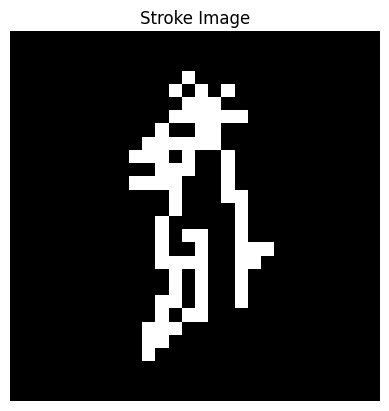

In [ ]:
# Example usage of the image_to_lines function
jpg_file_path = "/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname_per_cat['bird'][random.randint(1,len(picname_per_cat['bird'])-1)]
lines_image, strokes, raw_img = image_to_lines(jpg_file_path)

print("\033[1m" + "These are the raw stroke values, which we will use as basis for our input:", "\033[0m", "\n")
print(strokes, "\n")

print("\033[1m", "This is the recompiled stroke-based image, based on contour approximation algorithms:", "\033[0m", "\n")
np.set_printoptions(linewidth=150)
print(lines_image, "\n")

# Display the example stroke-based image
plt.imshow(lines_image, cmap='gray')
plt.title("Stroke Image")
plt.axis('off')
plt.show()

As you can see these stroke-based representations capture the relevant features for object recognition quite well for these pictographic character images. Let's apply it to all the data from the Oracle Bone Script dataset!

In [ ]:
# Use the image_to_lines function to transform all Oracle Bone Script images to stroke format
tot = 0
for OBcat in OBcats:
  for item in range(0, len(OBdict[OBcat]['bonescript'])):
    _,(OBdict[OBcat]['bonescript'][item]),_ = image_to_lines("/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname_per_cat[OBcat][item])
    tot += 1

print("Total amount of images: " + str(tot))

Total amount of images: 130


Here we define a selection of functions to be used for the processing and formatting of the images in our datasets.

In [ ]:
# Image processing and formatting for Quick, Draw! dataset:

def convert_to_PIL(drawing, width = 28, height = 28):
    """
    Function to convert from drawing to PIL image.
    INPUT:
        drawing - drawing from 'drawing' column
        width - width of the initial image
        height - height of the initial image
    OUTPUT:
        pil_img - (PIL Image) image
    """

    # Initialize empty (white) PIL image
    pil_img = Image.new('RGB', (width, height), 'white')
    pixels = pil_img.load()

    draw = ImageDraw.Draw(pil_img)

    # Draw strokes as lines
    for x,y in drawing:
        for i in range(1, len(x)):
            draw.line((x[i-1], y[i-1], x[i], y[i]), fill=0)

    return pil_img

def convert_to_np_raw(drawing, width = 28, height = 28):
    """
    INPUT:
        drawing - drawing in initial format
        width - width of the initial image
        height - height of the initial image
    OUTPUT:
        img - drawing converted to the numpy array (28 X 28)
    """
    # Initialize empty numpy array
    img = np.zeros((28, 28))

    # Create a PIL image out of drawing
    pil_img = convert_to_PIL(drawing, width = width, height = height)

    # Resize to 28,28
    pil_img.thumbnail((28,28), Image.LANCZOS)

    pil_img = pil_img.convert('RGB')
    pixels = pil_img.load()

    # Fill in numpy array with pixel values
    for i in range(0, 28):
        for j in range(0, 28):
            img[i, j] = 1 - pixels[j, i][0] / (width-1)

    return img

def convert_to_np(pil_img, width = 256, height = 256):
    """
    Function to convert PIL Image to numpy array.
    INPUT:
        pil_img - (PIL Image) image to be converted
    OUTPUT:
        img - (numpy array) converted image with shape (width, height)
    """
    pil_img = pil_img.convert('RGB')

    img = np.zeros((width, height))
    pixels = pil_img.load()

    for i in range(0, width):
        for j in range(0, height):
            img[i, j] = 1 - pixels[j, i][0] / 255

    return img

Illustration of the different formattings of images. Purely for fun, but also helpful to understand the transformations.

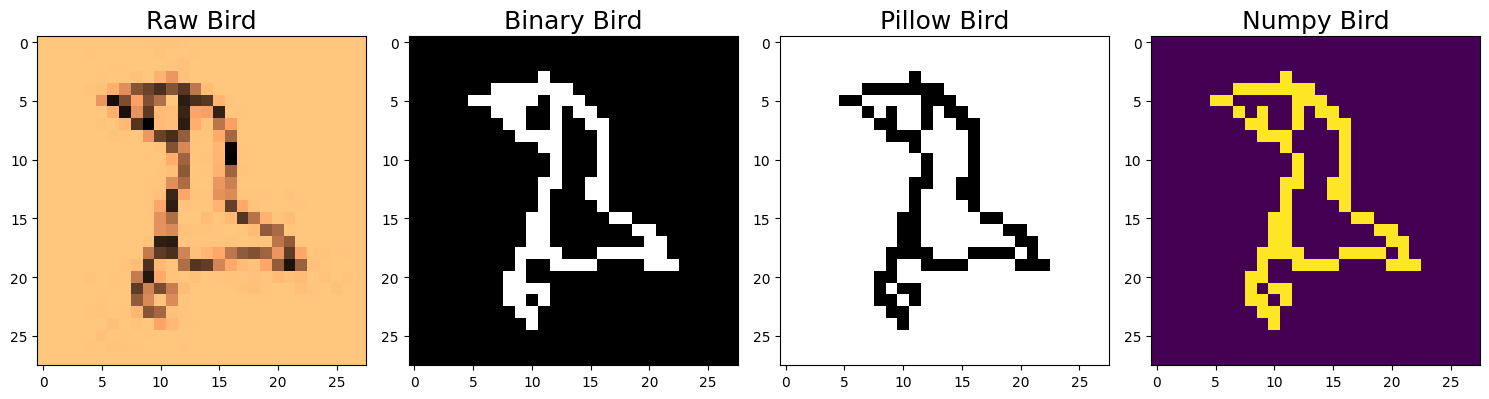

In [ ]:
# Creating a figure with 1 row and 4 columns of subplots, setting the overall size of the figure
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Retrieving a specific value from 'OBdict' and its nested keys ('OBcat' and 'bonescript') using the variable 'item'
bird_stroke = OBdict[OBcat]['bonescript'][item]

# Processing an image to extract lines and strokes related to a bird, using a function 'image_to_lines'
bird_lin, bird_stroke, raw_img = image_to_lines("/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname_per_cat['bird'][0])

# First image: Raw bird
axs[0].imshow(raw_img, cmap='copper')
axs[0].set_title('Raw Bird', fontsize=18)

# Second image: Binary bird
axs[1].imshow(bird_lin, cmap='gist_gray')
axs[1].set_title('Binary Bird', fontsize=18)

# Third image: Pillow bird
pil_bird = convert_to_PIL(bird_stroke, width=28, height=28) # Converting 'bird_stroke' to a Pillow format image (28x28)
axs[2].imshow(pil_bird)
axs[2].set_title('Pillow Bird', fontsize=18)

# Fourth image: Numpy bird
np_bird = convert_to_np(pil_bird, width=28, height=28) # Converting 'pil_bird' to a numpy array (28x28)
axs[3].imshow(np_bird)
axs[3].set_title('Numpy Bird', fontsize=18)


# Adjusting the layout of subplots to prevent overlapping
plt.tight_layout()

Now we use the functions we just defined to reshape the images into a format that is easier to work with for building DNN's. We do this for both the Oracle Bone Script and Quick, Draw! datasets.

We save these processed image arrays (OBX and X) and their corresponding category labels (OBy and y) to use later as inputs for our model.





In [ ]:
# Reshaping images of the Oracle Bone Script dataset

# Create the dictionary containing classes names as keys and images as values
OBvals_dict = {}

for OBcat in OBcats:
  OBdat = OBdict[OBcat]
  OBvals = [convert_to_np_raw(OBimg, width = 28, height = 28).reshape(1, 784) for OBimg in np.array(OBdict[OBcat]['bonescript'])]
  OBvals_dict[OBcat] = OBvals

OBX = []
OBy = []

for key, value in label_dict.items():
    data_i = OBvals_dict[value]
    Xi = np.concatenate(data_i, axis = 0)
    yi = np.full((len(Xi), 1), key).ravel()

    OBX.append(Xi)
    OBy.append(yi)

OBX = np.concatenate(OBX, axis = 0) # Save processed image array as OBX
OBy = np.concatenate(OBy, axis = 0) # Save the corresponding category labels as OBy



In [ ]:
# Reshaping images of the Quick, Draw! dataset

# Create the dictionary containing classes names as keys and images as values
values_dict = {}
for category in categories:
    data = classes[category][:500]
    values = [convert_to_np_raw(ast.literal_eval(img), width = 256, height = 256).reshape(1, 784) for img in data['drawing'].values]
    values_dict[category] = values

# concatenate to create X (values) and y (labels) datasets
X = []
y = []

for key, value in label_dict.items():
    data_i = values_dict[value]
    Xi = np.concatenate(data_i, axis = 0)
    yi = np.full((len(Xi), 1), key).ravel()

    X.append(Xi)
    y.append(yi)

X = np.concatenate(X, axis = 0)
y = np.concatenate(y, axis = 0)

##### ***Binarizing Quick, Draw! dataset***
In order to make sure that both our datasets are optimally alike in their nature, we decided to reduce inter-dataset variation by binarizing the Oracle Bone Script images in the ***images_to_lines()*** function (each pixel is either coded 0 or 1). However, the Quick, Draw! dataset images are currently still coded on a greyscale, with values ranging from 0 to 1.

Here we binarize the Quick, Draw! images so that the pixels coded with the highest 7% values on the greyscale are recoded as 1's and the rest as 0's. This perserved the lines of the Quick, Draw! doodles fully while also transforming them into the same format as the Oracle Bone Script images to improve generalization.


In [353]:
# Keep only the highest 7% of the values and recode these to 1's,  recode the rest to 0.
for i in range(len(X)):
  loc_thresh = np.percentile(X[i], 83)
  X[i][X[i] < loc_thresh] = 0
  X[i] = (X[i] > 0) * 1

#### ***Visualize datasets***

Now that the two datasets have now been transformed into the same format, let's take a look at some random selections of the two datasets to inspect what we're feeding and testing the network with!

#### ***Functions***
To visualize the datasets, let's define some functions first.

In [354]:
def view_images_grid(X, y):
    """
    Function to plot grid with several examples of images.
    INPUT:
        X - (numpy array) images dataset
        y - (numpy array) labels for images from X dataset

    OUTPUT: None
    """
    fig, axs = plt.subplots(5, 10, figsize=(20,10))

    for label_num in range(0,50):
        r_label = random.randint(0, len(X) - 1)
        image = X[r_label].reshape(28,28)  #reshape images
        i = label_num // 10
        j = label_num % 10
        axs[i,j].imshow(image, cmap = 'binary') #plot the data
        axs[i,j].axis('off')
        axs[i,j].set_title(label_dict[y[r_label]], fontsize = 15, loc = "center")

    plt.show()

This is a sample from the actual data that we will to test our model on after having been transformed in the same format and dimensions as the Quick, Draw! dataset. Here we see a random selection of some of the categories with corresponding images from the Oracle Bone Script dataset:

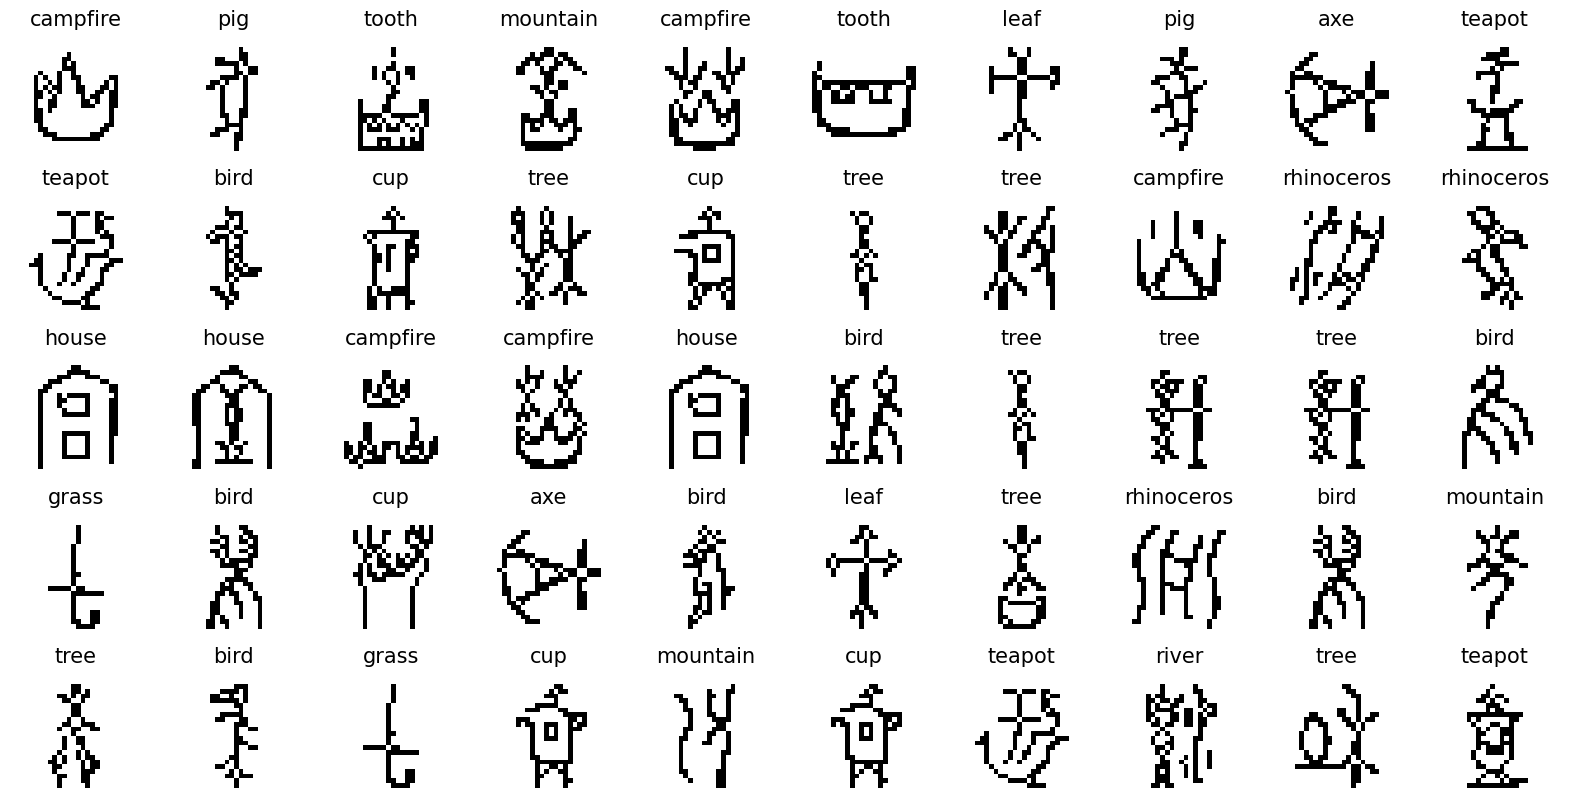

In [355]:
# Take a look at the OB dataset images
view_images_grid(OBX, OBy)

And now a sample from the Quick, Draw! dataset:

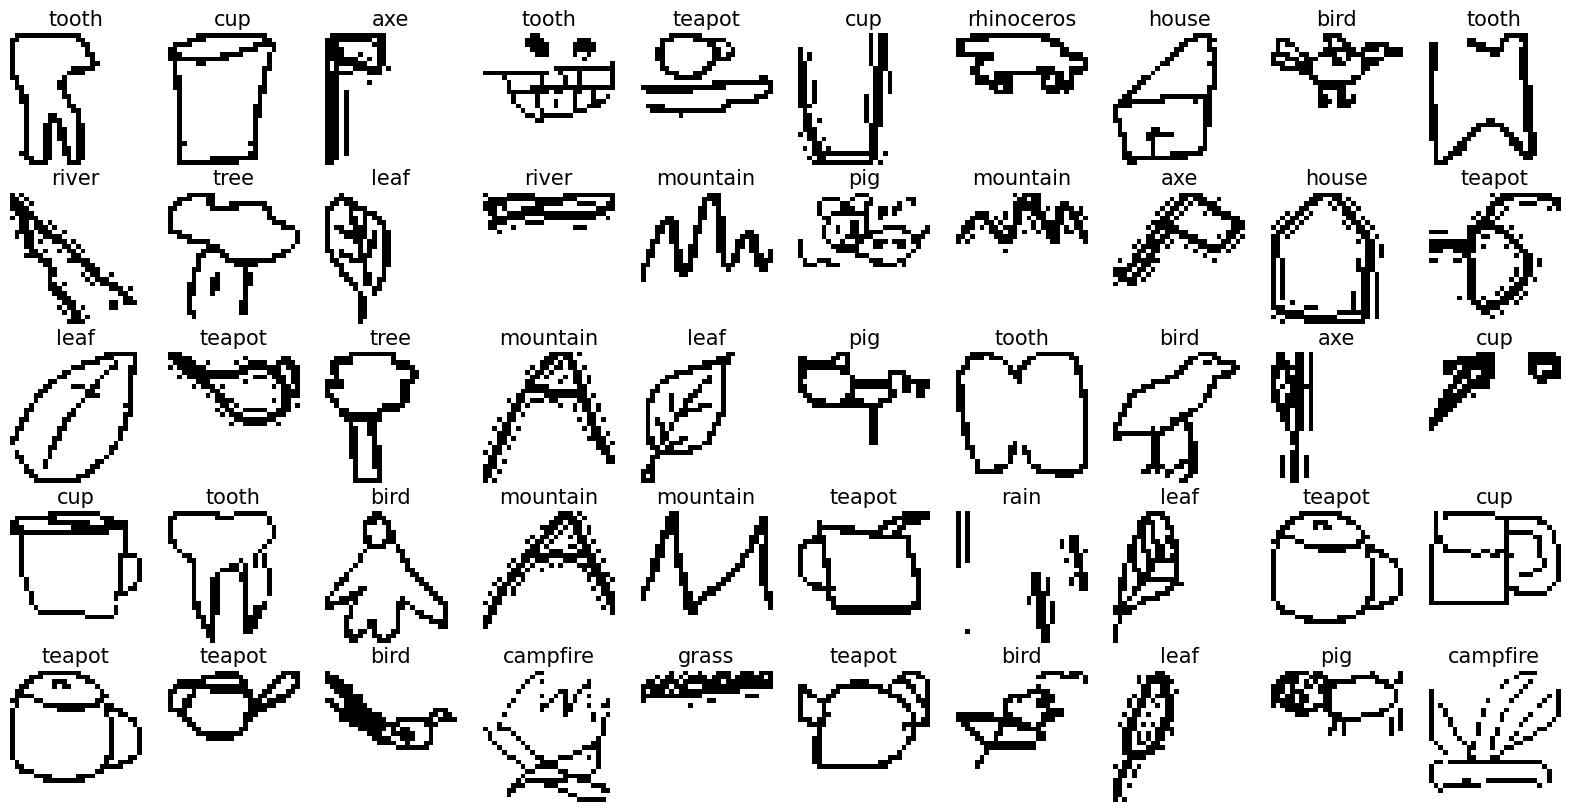

In [ ]:
# Take a look at the QD dataset images
view_images_grid(X, y)

We can also take a closer look at the images per category in the Oracle Bone Script Dataset! For example, let's take a look at those from the category "house". This allows us to inspect potential representational overlap or differences between the categories in both datasets.

> Note: You can only plot 1 category at once, as it otherwise tends to crash.







In [ ]:
# Function to plot category-specific instances of the Quick, Draw! dataset.
def show_QD_img(show_cat):
    """
    Function which displays all images within one category of QD dataset.
    INPUT:
        show_cat - (string)name of category

    OUTPUT: wdth (width of the figure, used to create equally wide line in between)
    """
    n_img = len(picname_per_cat[show_cat])

    if n_img < 7:
        wdth = n_img * 4
        fig, axs = plt.subplots(1, n_img, figsize=(wdth, 5))
        for i in range(n_img):
            img = values_dict[show_cat][random.randint(1,500)]
            thr = np.percentile(img, 83)
            img[img > thr] = 255
            img = (img < 255) * 1
            axs[i].imshow(img.reshape(28, 28).squeeze(), cmap = 'gray')
            axs[i].set_title(show_cat, fontsize=15)
            axs[i].axis('off')

    elif n_img >= 7:
        num_cols = 6
        num_rows = (n_img) // (num_cols) + 1
        wdth = 15
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(wdth, (3 * num_rows)))

        # Initialize a counter for the subplot index
        i = 0

        # Iterate over images in the category
        for i in range(0, n_img):
            # Get the subplot corresponding to the current index
            img = values_dict[show_cat][random.randint(1,500)]
            thr = np.percentile(img, 83)
            img[img > thr] = 255
            img = (img < 255) * 1
            ax = axs[i // num_cols, i % num_cols]

            # Load and display the image
            ax.set_title(show_cat, fontsize=15)
            ax.imshow(img.reshape(28, 28).squeeze(), cmap='gray')
            ax.axis('off')

        # Hide empty subplots
        for j in range(i, num_rows * num_cols):
            axs[j // num_cols, j % num_cols].axis('off')

    return wdth

# Similar function for the Oracle Bone Script dataset
def show_OB_img(show_cat):
    """
    Function which displays all images within one category of OB dataset.
    INPUT:
        show_cat - (string)name of category

    OUTPUT: wdth (width of the figure, used to create equally wide line in between)
    """
    # Calculate the number of rows and columns based on the total number of images
    n_img = len(picname_per_cat[show_cat])

    if n_img < 7:
        wdth = n_img * 4
        fig, axs = plt.subplots(1, n_img, figsize=(wdth, 5))
        for i in range(n_img):
            jpg_path = "/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname_per_cat[show_cat][i]
            _, strokes, _ = image_to_lines(jpg_path)
            img = convert_to_PIL(strokes)
            axs[i].imshow(img)
            axs[i].set_title(show_cat, fontsize=15)
            axs[i].axis('off')

    elif n_img >= 7:
        num_cols = 6
        num_rows = (n_img) // (num_cols) + 1
        wdth = 15
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(wdth, (3 * num_rows)))

        # Initialize a counter for the subplot index
        i = 0

        # Iterate over images in the category
        for item in range(0, n_img):
            # Get the subplot corresponding to the current index
            jpg_path = "/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname_per_cat[show_cat][item]
            _, strokes, _ = image_to_lines(jpg_path)
            img = convert_to_PIL(strokes)
            ax = axs[i // num_cols, i % num_cols]

            # Load and display the image
            # Make sure img is a NumPy array with a numeric dtype
            img = np.asarray(img, dtype=np.uint8)
            ax.set_title(show_cat, fontsize=15)
            ax.imshow(img, cmap='gray')
            ax.axis('off')

            # Increment the subplot index
            i += 1

        # Hide empty subplots
        for j in range(i, num_rows * num_cols):
            axs[j // num_cols, j % num_cols].axis('off')

    return wdth

Let's have a look at the differences between category representations in both of the datasets by plotting images from either dataset alongside one another.

The upper half contains QD images, the bottom half OB images: 



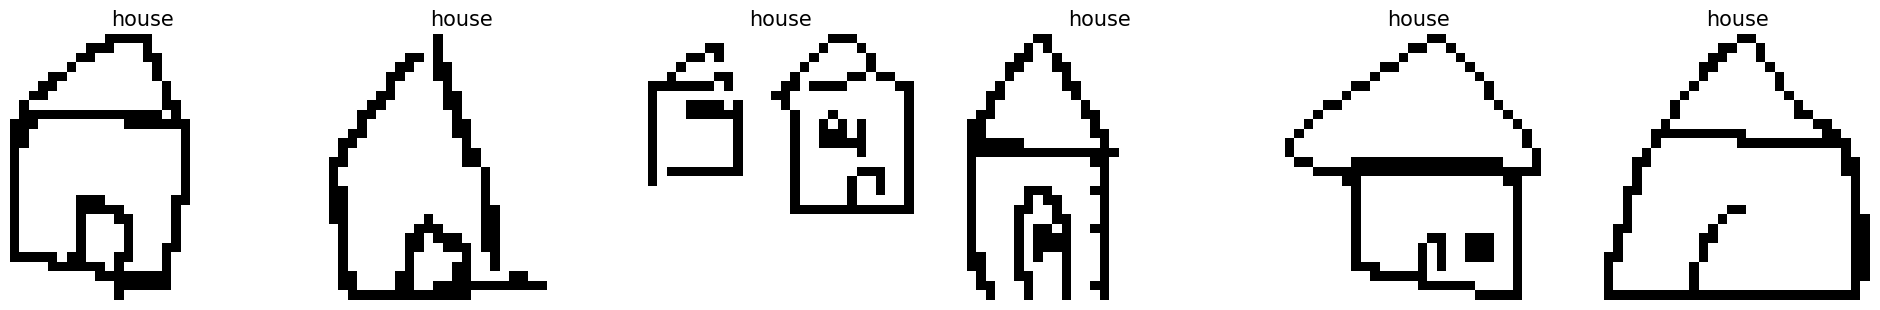

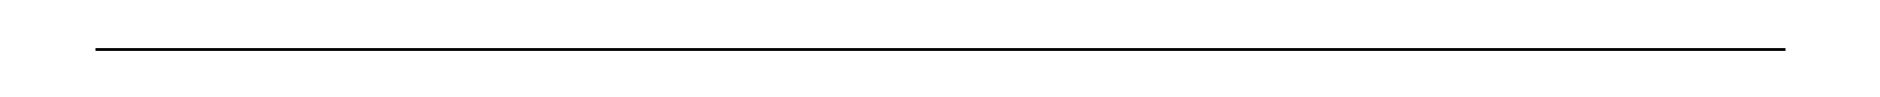

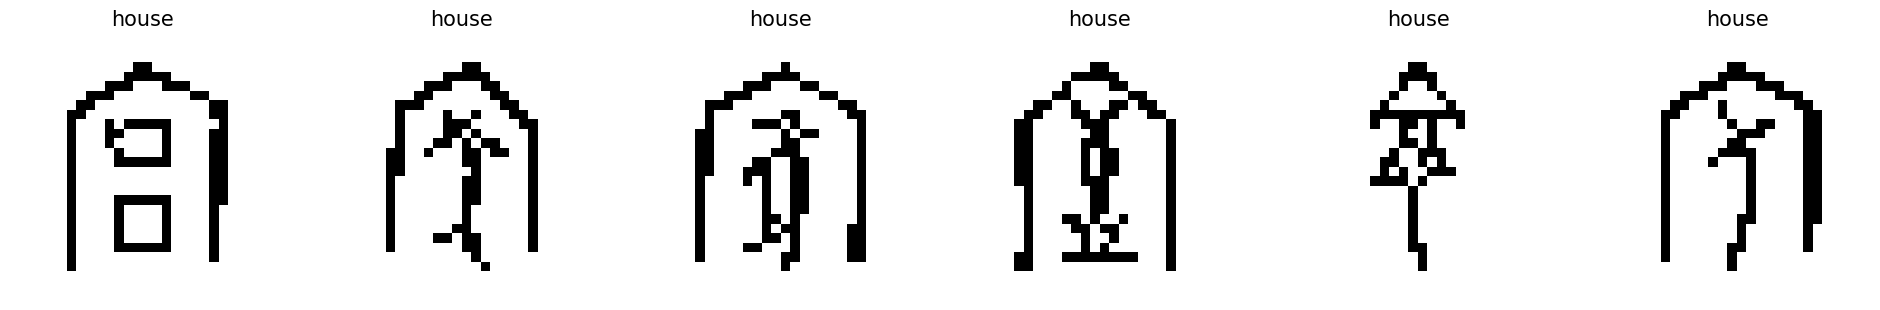

In [356]:
# Choose one of the categories below as argument to show all instances:"
# ['tree', 'bird', 'teapot', 'leaf', 'axe', 'campfire', 'pig', 'mountain', 'rain', 'grass', 'house', 'cup', 'tooth', 'river', 'rhinoceros']

show_cat = 'house' # Example category

print("The upper half contains QD images, the bottom half OB images:", "\n")

# Show the Quick, Draw! images and get the width of the plot
# wdth = show_QD_img(show_cat)
wdth = show_QD_img(show_cat)

fig, ax = plt.subplots(figsize=(wdth, 1))

# Plot a horizontal line using ax.hlines
ax.hlines(y=0, xmin=0, xmax=1, color='black', linewidth=2)

# Turn off the y-axis
ax.get_yaxis().set_visible(False)
ax.axis('off')

# Display the figure
plt.show()

# Show the Oracle Bone Script images
_ = show_OB_img(show_cat)


#### ***Heatmaps per category of datasets***

Let's also take a look at the heatmaps per class of the two datasets. These heatmaps provide insight regarding the variability within category representations. Categories that comprise rather diverse visual representations of the corresponding object will show a more cloud-like, opaque heatmap with vaguely discernable category-specific features. When these visual representations are more consistent, these features are easier to detect in the heatmaps. Heatmaps can be acquired by taking the overall average of all data instances within one category. Consequently, they depend largely on the amount of data that you have. The more data you have, the more spatially smeared the representation will be. This explains the rather specific heatmaps for the Oracle Bone Script dataset; It includes a relatively lower number of images per category compared to the Quick, Draw! dataset.

#### ***Functions***

Let's first define a function again.

In [ ]:
# Acquire and plot the heatmaps for X, y

def plot_label_heatmaps(X, y, label_dict, num_cols=5, figsize=(10, 10)):
    """
    Function to plot the heatmaps for images with the specified labels.

    Parameters:
    - X: numpy array, dataset
    - y: numpy array, labels for X dataset
    - label_dict: dictionary, mapping of label values to label names
    - num_cols: int, number of columns in the subplot grid (default is 5)
    - figsize: tuple, figure size (default is (10, 10))

    Output: None
    """
    def get_label_heatmap(X, y, label):
        label_filter = y == label
        X_labeled = X[label_filter]
        X_mean = np.sum(X_labeled, axis=0)
        return X_mean

    # Calculate the number of rows based on the total number of subplots
    total_plots = len(label_dict)
    num_rows = (total_plots - 1) // num_cols + 1

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Iterate over label_dict items
    for idx, (label, label_name) in enumerate(label_dict.items()):
        # Get heatmap
        heatmap = get_label_heatmap(X, y, label)

        # Calculate the subplot position
        i = idx // num_cols
        j = idx % num_cols

        # Plot image
        axs[i, j].set_title(label_name, fontsize=15)
        axs[i, j].imshow(heatmap.reshape(28, 28).squeeze(), cmap='bone')
        axs[i, j].axis('off')

    # Hide empty subplots
    for idx in range(len(label_dict), num_rows * num_cols):
        axs[idx // num_cols, idx % num_cols].axis('off')

    plt.tight_layout()
    plt.show()



Here below are the heatmaps per category for the Quick, Draw! dataset. You can see that the heatmaps for all the categories are quite cloud-like, indicating high diversity in visual representations.

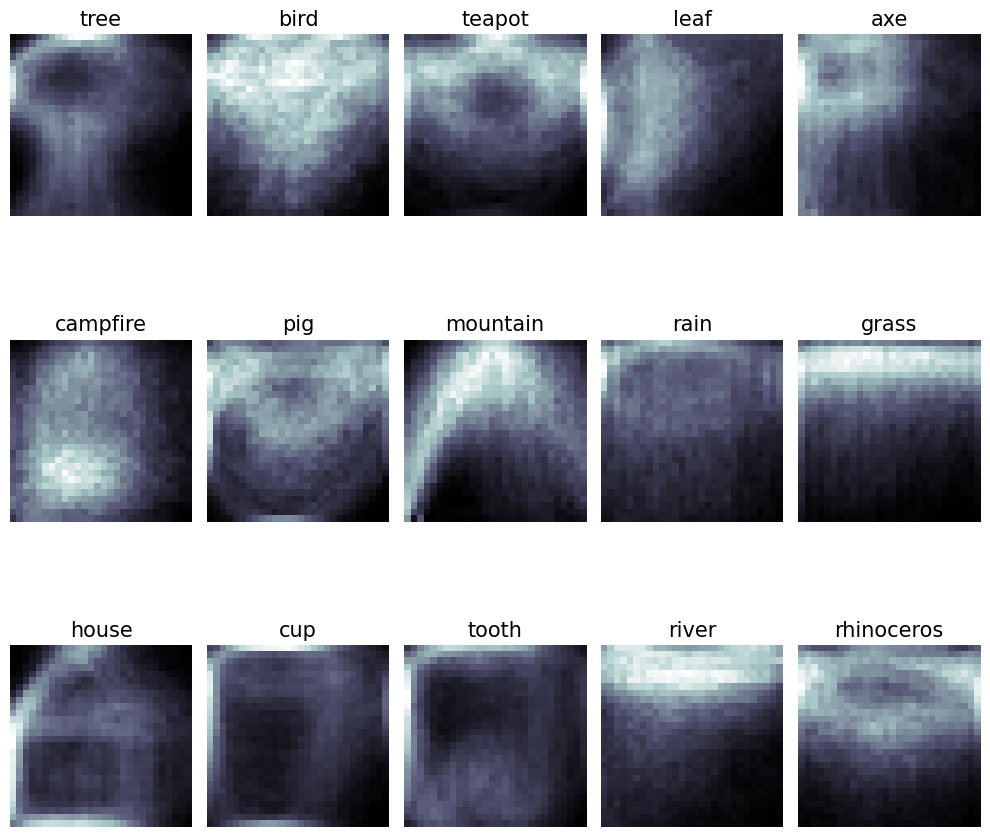

In [ ]:
# Heatmaps for Quick, Draw! Dataset.
plot_label_heatmaps(X, y, label_dict)

These are the heatmaps per category for the Oracle Bone Script dataset. Again, these heatmaps are not as blurred compared to the Quick, Draw! ones, indicating that the Oracle Bone Script dataset contains lower diversity in representations per category.

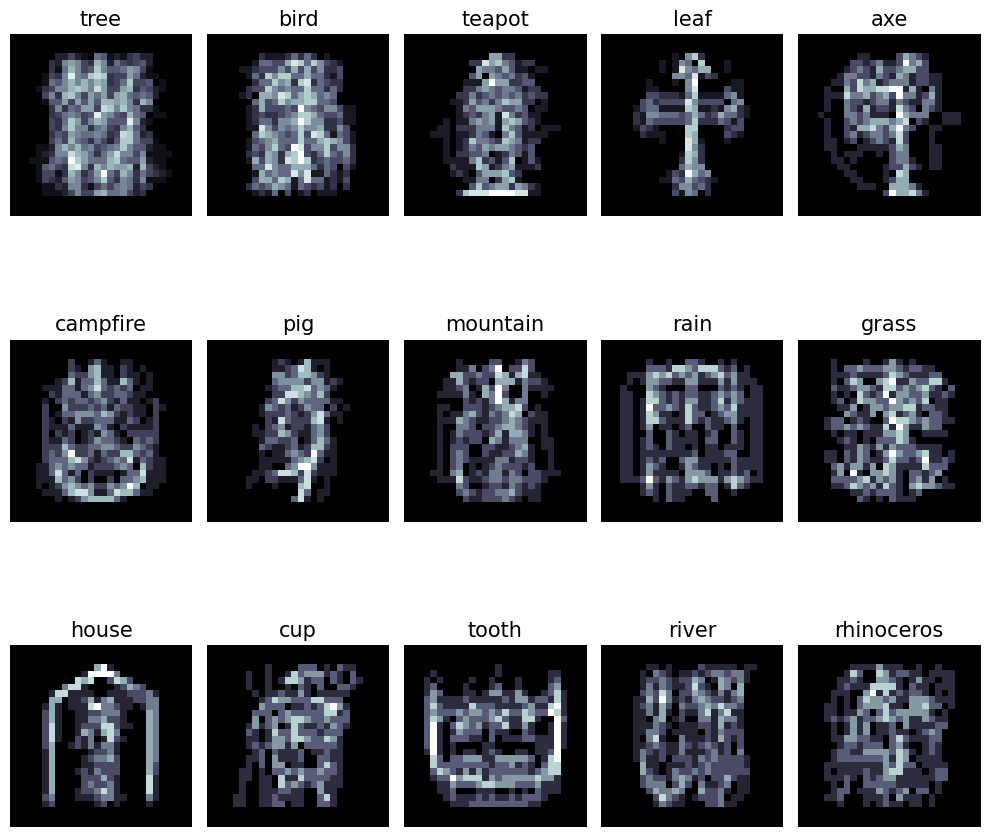

In [ ]:
# Heatmaps for Oracle Bone Dataset.
plot_label_heatmaps(OBX, OBy, label_dict)

### **Model architectures**

We want to check how a DNN trained on Quick, Draw! images would perform when we test it on an out-of-distribution sample, namely the Oracle Bone Script images.

To this end, we start by modifying a simple feedforward multilayer perceptron (MLP) (original taken from this [kaggle notebook](https://www.kaggle.com/code/aleksandradeis/getting-started-with-pytorch-for-quick-draw)) to build our own MLP baseline model. Since we are working with images, we also wannted to try out  a Convolutional Neural Network (CNN). To do this, we build a custom CNN by adding convolutional layers to our baseline MLP and we will later compare the OOD generalization performance of the two different model architectures.

Both models use *RELU activation function* for feature enhancement with *softmax activation function* for multiclass predictions.


#### ***The Multi Layer Perceptron (MLP)***
The **MLP baseline model** architecture consists of:

* **1st fully-Connected layer**
* **ReLU nonlinear activation function**
* **Dropout layer** with .5 probability (to improve generalization)
* **2nd fully-Connected layer**
* **Batch Normalization layer**
* **ReLU nonlinear activation function**
* **Dropout layer** with .5 probability
* **3rd fully-Connected layer**
* **Output Layer** with *softmax* activation function for multiclass predictions



![MLP architecture](https://drive.google.com/uc?export=view&id=1W13rHkCHWMpmYHoVVgBXGboxJ-7EOvZK)

In [395]:
# Create a class for our MLPModel
class MLPModel(nn.Module):

    def __init__(self, input_size, hidden_sizes, output_size, dropout=0.5):
        super(MLPModel, self).__init__()

        # Calculate the total number of input features
        total_input_features = 1
        for size in input_size:
            total_input_features *= size

        # Fully connected layers
        self.fc_layers = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(total_input_features, hidden_sizes[0])),
            ('relu1', nn.ReLU()),
            ('dropout1', nn.Dropout(dropout)),
            ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('bn2', nn.BatchNorm1d(num_features=hidden_sizes[1])),
            ('relu2', nn.ReLU()),
            ('dropout2', nn.Dropout(dropout)),
            ('fc3', nn.Linear(hidden_sizes[1], output_size))
        ]))

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input before passing it to fully connected layers
        x = self.fc_layers(x)
        return x


#### ***The Convolutional Neural Network (CNN)***
The **custom CNN** architecture is as follows:
* **Two Convolutional Layers** with 3x3 kernels
* **MaxPooling Layer** with a 2x2 kernel
* **First Fully-Connected layer**
* **ReLU nonlinear activation function**
* **Dropout layer** with .5 probability
* **Second Fully-Connected layer**
* **Batch Normalization layer**
* **ReLU nonlinear activation function**
* **Output Layer** with *softmax* activation function for multiclass predictions.



![CNN architecture](https://drive.google.com/uc?export=view&id=17A2J-in3xhnKr8R7YLw3xp0bLuVq2-uw)

In [394]:
# Create a class for our CNNModel
class CustomModel(nn.Module):

    def __init__(self, input_size, hidden_sizes, output_size, dropout=0.5):
        super(CustomModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

        # Adaptive calculation of the size after convolutional and pooling layers
        self.conv_out_size = self.calculate_conv_out_size(input_size)

        self.fc_layers = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(self.conv_out_size, hidden_sizes[0])),
            ('relu1', nn.ReLU()),
            ('dropout', nn.Dropout(dropout)),
            ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('bn2', nn.BatchNorm1d(num_features=hidden_sizes[1])),
            ('relu2', nn.ReLU()),
            ('dropout', nn.Dropout(dropout)),
            ('logits', nn.Linear(hidden_sizes[1], output_size))
        ]))

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the output before passing it to fully connected layers
        x = self.fc_layers(x)
        return x

    def calculate_conv_out_size(self, input_size):
        # Dummy forward pass to calculate the size after convolutional and pooling layers
        with torch.no_grad():
            x = torch.zeros(1, *input_size)
            x = F.relu(self.conv1(x))
            x = self.pool(x)
            x = F.relu(self.conv2(x))
            x = self.pool(x)
        return x.view(1, -1).size(1)


#### ***Data Augmentation***
We further preprocessed the training data via data augmentation. Artificial data augmentation is often employed to inflate sample size to better capitalize on the capabilities of deep neural networks as well as to prevent overfitting (Shorten & Khoshgoftaar, 2019). Therefore, we use this to hopefully help bridge differences in representation between the QD and OB images and improve model performance. For instance, depictions of animals in the OB dataset are for the most part sideways (head on top, tail at bottom, legs facing left) while in the QD dataset many are with their legs facing down.

* **Flipping** Images are flipped along the vertical dimension (left-right).
* **Rotation** Images are rotated 270 degrees.
* **Rotation and flipping** Rotated images are flipped along the vertical dimension (left-right)

#### ***Functions for model training***

In [359]:
def shuffle(X_train, y_train):
    """
    Function which shuffles training dataset.
    INPUT:
        X_train - (tensor or numpy array) training set
        y_train - (tensor or numpy array) labels for training set
    OUTPUT:
        X_train_shuffled - (tensor or numpy array) shuffled training set
        y_train_shuffled - (tensor or numpy array) shuffled labels for training set
    """
    if isinstance(X_train, torch.Tensor):
        X_train_shuffled, y_train_shuffled = X_train.clone(), y_train.clone()
        permutation = torch.randperm(X_train.size(0))
        X_train_shuffled = X_train_shuffled[permutation]
        y_train_shuffled = y_train_shuffled[permutation]
    else:
        # Assuming X_train and y_train are NumPy arrays
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

    return X_train_shuffled, y_train_shuffled

def view_classify(img, ps):
    """
    Function for viewing an image and it's predicted classes
    with matplotlib.

    INPUT:
        img - (tensor) image file
        ps - (tensor) predicted probabilities for each class
    """
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(len(ps)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(ps)))
    ax2.set_yticklabels(OBcats, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()

def test_model(model, img):
    """
    Function creates test view of the model's prediction for image.

    INPUT:
        model - pytorch model
        img - (tensor) image from the dataset

    OUTPUT: None
    """

# Convert 2D image to 1D vector and then to a PyTorch tensor
    img = torch.from_numpy(img).float().view(1, -1)
    ps = get_preds(model, img)
    view_classify(img.view(1, 28, 28), ps)

def get_preds(model, input):
    """
    Function to obtain predictions from a PyTorch model for input data.

    INPUT:
        model - PyTorch model used for prediction
        input - Input data (numpy array or PyTorch tensor) to make predictions on

    OUTPUT:
        ps - Predicted probabilities tensor
    """
    # Turn off gradients to speed up this part
    with torch.no_grad():
        # If the input is not a tensor yet, convert it
        if not isinstance(input, torch.Tensor):
            input = torch.from_numpy(input).float()
        # Ensure the input has the shape [batch_size, 1, height, width]
        input = input.view(-1, 1, 28, 28)
        logits = model(input)
    ps = F.softmax(logits, dim=1)
    return ps

def get_labels(pred):
    """
        Function to get the vector of predicted labels for the images in
        the dataset.

        INPUT:
            pred - (tensor) vector of predictions (probabilities for each class)
        OUTPUT:
            pred_labels - (numpy) array of predicted classes for each vector
    """
    pred_labels = np.argmax(pred.numpy(), axis=1)
    pred_labels = pred_labels.reshape(len(pred_labels), 1)

    return pred_labels

def evaluate_model(model, train, y_train, validate, y_val, n_steps, print_every):
    """
    Function to print out train and validation accuracy of the model.

    INPUT:
        model - pytorch model
        train - (tensor) train dataset
        y_train - (numpy) labels for train dataset
        validate - (tensor) validation dataset
        y_val - (numpy) labels for validation dataset

    OUTPUT:
        accuracy_train - accuracy on train dataset
        accuracy_validation - accuracy on validation dataset
    """
    train_pred = get_preds(model, train)
    train_pred_labels = get_labels(train_pred)

    validate_pred = get_preds(model, validate)
    validate_pred_labels = get_labels(validate_pred)

    accuracy_train = accuracy_score(y_train, train_pred_labels)
    accuracy_validation = accuracy_score(y_val, validate_pred_labels)
    if print_every > 0 and n_steps % print_every == 0:
      print("Accuracy score for train set is {} \n".format(accuracy_train))
      print("Accuracy score for test set is {} \n".format(accuracy_validation))

    return accuracy_train, accuracy_validation

**Fit function that works for both the CNN and MLP adaptively.**

Here is a brief elaboration on what happens within the fit function:

**Initialize:** Determine usage of cross-entropy loss criterion, select the optimizer following the input parameter, and set up required variables for intermediate accuracy tracking and early stopping.

**Training Loop:** Iterative process over all determined epochs. Within each epoch, training input is shuffled and the model is trained on a set amount of chunks that follows the n_chunks argument. Consequently, the weight gradients are calculated, then the chosen optimizer assigns new values to the parameters.

**Accuracy Evaluation:** Accuracy is evaluated for every completed epoch, both for the train and validation set through the earlier defined evaluate_model function.

**Validation Loss and Early Stopping:** Validation loss is calculated per epoch to determine the relative progress of the training phase. In case the progress stagnates, a counter starts that terminates the training once it reaches a predetermined value given in the *patience* argument. This is the early stopping mechanism and helps us prevent overfitting.

This function encapsulates the training process, including data preparation, model training, and early stopping based on validation performance.

In [360]:
def fit_model(model, X_train, y_train, X_val, y_val, model_type='MLP', epochs=100, n_chunks=1000,
              learning_rate=0.003, weight_decay=0, dropout=0.0, optimizer='SGD', patience=5):
    criterion = nn.CrossEntropyLoss()
    e = 0

    # Choose optimizer based on the input parameter
    if optimizer == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    print_every = 1
    steps = 0
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    train_acc = []
    test_acc = []

    for e in range(epochs):
        running_loss = 0

        # Shuffle the training data before each epoch
        X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

        # Calculate the accuracy by comparing predicted labels with actual labels
        accuracy_train, accuracy_test = evaluate_model(model, X_train, y_train, X_val, y_val, n_steps=steps, print_every=10)

        train_acc.append(accuracy_train)
        test_acc.append(accuracy_test)

        for i in range(0, len(X_train_shuffled), n_chunks):
            steps += 1
            optimizer.zero_grad()

            # Convert NumPy arrays to PyTorch tensors
            images = torch.from_numpy(X_train_shuffled[i:i + n_chunks]).float()

            # Conditionally reshape based on the model type
            if model_type == 'CNN':
                images = images.view(-1, 1, 28, 28)

            labels = torch.from_numpy(y_train_shuffled[i:i + n_chunks]).long()

            # Forward and backward passes
            output = model(images)
            loss = criterion(output, labels.squeeze())
            loss.backward()  # Calculate gradients
            optimizer.step()  # Update parameters based on this

            running_loss += loss.item()

        # Validation loss calculation (this is purely done for early stopping)
        val_images = torch.from_numpy(X_val).float()

        # Conditionally reshape based on the model type
        if model_type == 'CNN':
            val_images = val_images.view(-1, 1, 28, 28)

        val_labels = torch.from_numpy(y_val).long()
        val_output = model(val_images)
        val_loss = criterion(val_output, val_labels.squeeze())

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Stopping early. No improvement for {patience} consecutive epochs.")
            break

        if e % print_every == 0:
            print("Epoch: {}/{}... ".format(e + 1, epochs), "Loss: {:.4f}".format(running_loss / print_every))
            running_loss = 0

    return train_acc, test_acc, e


#### ***Functions for data augmentation***

In [361]:
def convert_to_PIL_from_np(img):
    """
    Function to convert numpy (1, 784) image to PIL image.
    INPUT:
        img - (numpy array) image from train dataset with size (1, 784)
    OUTPUT:
        pil_img - (PIL Image) 28x28 image
    """
    img_r = img.reshape(28,28)

    pil_img = Image.new('RGB', (28, 28), 'white')
    pixels = pil_img.load()

    for i in range(0, 28):
        for j in range(0, 28):
            if img_r[i, j] > 0:
                pixels[j, i] = (255 - int(img_r[i, j] * 255), 255 - int(img_r[i, j] * 255), 255 - int(img_r[i, j] * 255))

    return pil_img

def rotate_image(src_im, angle = 270, size = (28,28)):
    """
    Function to rotate PIL Image file
    INPUT:
        src_im - (PIL Image) 28x28 image to be rotated
        angle - angle to rotate the image
        size - (tuple) size of the output image
    OUTPUT:
        dst_im - (PIL Image) rotated image
    """
    dst_im = Image.new("RGBA", size, "white")
    src_im = src_im.convert('RGBA')

    rot = src_im.rotate(angle)
    dst_im.paste(rot, (0, 0), rot)

    return dst_im

def flip_image(src_im):
    """
    Function to flip (left-right) a PIL Image file.
    INPUT:
        scr_im - (PIL Image) image to be flipped
    OUTPUT:
        dst_im - (PIL Image) flipped image
    """
    dst_im = src_im.transpose(Image.FLIP_LEFT_RIGHT)
    return dst_im

def flip_rotated_image(src_im):
    """
    Function to flip (top-down) a PIL Image file.
    INPUT:
        scr_im - (PIL Image) image to be flipped
    OUTPUT:
        dst_im - (PIL Image) flipped image
    """
    dst_im = src_im.transpose(Image.FLIP_LEFT_RIGHT)
    return dst_im

def add_flipped_and_rotated_images(X_train, y_train):
    """
    Function which adds flipped and rotated images to the original dataset.
    INPUT:
        X_train - (numpy array) the original training set
        y_train - (numpy array) original labels dataset
    OUTPUT:
        X_Train_new - (numpy array) the dataset with added flipped and rotated
        images
        y_train_new - (numpy array) labels for the new training dataset
    """
    print("Adding flipped and rotated images to the training set. \n")

    X_train_new = X_train.copy()
    y_train_new = y_train.copy().reshape(y_train.shape[0], 1)

    for i in range(0, X_train.shape[0], 10): # I will skip some images just to run this faster
        # get image to rotate and flip
        img = X_train[i]
        pil_img = convert_to_PIL_from_np(img)

        # rotate and flip
        rotated = convert_to_np(rotate_image(pil_img), 28, 28)
        flipped = convert_to_np(flip_image(pil_img), 28, 28)
        rotated_flipped = convert_to_np(flip_rotated_image(pil_img), 28, 28)

        # add to the original dataset
        X_train_new = np.append(X_train_new, rotated.reshape(1, 784), axis = 0)
        X_train_new = np.append(X_train_new, flipped.reshape(1, 784), axis = 0)
        X_train_new = np.append(X_train_new, rotated_flipped.reshape(1, 784), axis = 0)
        y_train_new = np.append(y_train_new, y_train[i].reshape(1,1), axis = 0)
        y_train_new = np.append(y_train_new, y_train[i].reshape(1,1), axis = 0)
        y_train_new = np.append(y_train_new, y_train[i].reshape(1,1), axis = 0)

        # print out progress
        if i % 1000 == 0:
            print("Processed {i} files out of {total}.".format(i= i, total = X_train.shape[0]))

    return X_train_new, y_train_new

Let's see how the flip and rotate images functions work by visualizing an example!

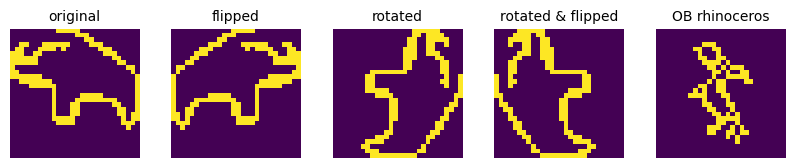

In [375]:
# Example Quick, Draw! image from "rhinoceros" category, augmented three ways
np_img = (X[y == 15][11].reshape(28,28).squeeze())
np_img_flipped = convert_to_np(flip_image(convert_to_PIL_from_np(np_img)), 28, 28) # Flipped (left-right)
np_img_rotated = convert_to_np(rotate_image(convert_to_PIL_from_np(np_img)), 28, 28) # Rotated 270 degrees
np_img_rotated_flipped = convert_to_np(flip_rotated_image(convert_to_PIL_from_np(np_img_rotated)), 28, 28) #Rotated image is flipped

# Example Orable Bone Script image from "tiger" category
jpg_path = "/content/drive/MyDrive/DLiP/oracle_bone/image/" + picname_per_cat['rhinoceros'][0]
_,strokes,_ = image_to_lines(jpg_path)
OB_img = convert_to_PIL(strokes)
np_OB_img = convert_to_np(OB_img, 28, 28)

# Set up formtting for plot
fig, axs = plt.subplots(1,5, figsize=(10,10))

# Plot the original image
axs[0].set_title('original', fontsize = 10)
# axs[0].imshow(np_img.reshape(28, 28).squeeze())
axs[0].imshow(np_img)

axs[0].axis('off')

# Plot the flipped image
axs[1].set_title('flipped', fontsize = 10)
axs[1].imshow(np_img_flipped.reshape(28, 28).squeeze())
axs[1].axis('off')

# Plot the rotated image
axs[2].set_title('rotated', fontsize = 10)
axs[2].imshow(np_img_rotated.reshape(28, 28).squeeze())
axs[2].axis('off')

# Plot the rotated & flipped image
axs[3].set_title('rotated & flipped', fontsize = 10)
axs[3].imshow(np_img_rotated_flipped.reshape(28, 28).squeeze())
axs[3].axis('off')

# Plot the Oracle Bone Script example of image in "rhinoceros" category
axs[4].set_title('OB rhinoceros', fontsize = 10)
axs[4].imshow(np_OB_img.reshape(28, 28).squeeze())
axs[4].axis('off')

plt.subplots_adjust(wspace = 0.25)

### **Model Configuration**

Lastly, before we begin, here are some additional specifications for our model configurations:


1. **Compiling**: (1) optimizer: Stochastic Gradient Descent (2) learning rate: 0.02 (3) loss function: nn.CrossEntropyLoss function (4) Drop-Out rate: .7 (5) amount of chunks: 75 (6) epochs = 160 (or more, depending on patience value) (7) weight decay, regularization: .08

2. **Early Stopping**: A widely used approach to forestall a model from delving into extreme variance and minimal bias zones is termed "early stopping." Frequently, models lean towards closely fitting the training data, inadvertently capturing both noise and certain underlying patterns, otherwise known as **overfitting**. Early stopping serves as a preventative measure against this occurrence. In essence, the method halts the training process upon detecting an uptick in validation loss, acting as a checkpoint in the function's behavior. Since we are interested in OOD generalization, it is especially important that we try to avoid overfitting.

### ***Model training***

Now let's fit the models!

We will train both the MLP and the CNN.
The validation set of Quick, Draw! images are included during model training so that we can test the model's pperformance on new data. The test set, including the one held out from Quick, Draw! and the Oracle Bone Script images will be used to evaluate the model's performance later on, after training has finished.



First we correct for the incorrect indices values of the labels. The function is written in such way that it only runs if the lowest value is larger than 0, indicating that the indexing of python has not yet been taken into account.

In [363]:
print("Minimum values before index correction: ", + min(y), min(OBy))

def id_rectify(arr, min_value):
    return np.clip(arr - 1, a_min=min_value, a_max=None)

min_value = 0  # Set minimum value

if np.min(y) > min_value:
    y = id_rectify(y, min_value)

if np.min(OBy) > min_value:
    OBy = id_rectify(OBy, min_value)

print("Minimum values after index correction: ", + min(y), min(OBy))

Minimum values before index correction:  1 1
Minimum values after index correction:  0 0


Next, we split the Quick, Draw! dataset into train (70%), validation (10%), and test sets (20%).

Since we will only use the Oracle Bone Script dataset for testing, we leave it as it is and assign its images and labels as test set.

In [364]:
# Split Quick, Draw! dataset into train/validation/test sets for Quick, Draw!
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# Split Quick, Draw! dataset into train vs. test & validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1-train_ratio) # Train is now 70% of original dataset

# Split test & validation into test vs. validation
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio)) # Test is now 20% and validation is now 10% of dataset

In [365]:
# Use all of Oracle Bone dataset for testing
OBX_test = OBX  # Images for Oracle Bone
OBy_test = OBy  # Labels for Oracle Bone

Add the augmented images of the Quick, Draw! dataset to the training set.

In [366]:
# Add the augmented images to the Quick, Draw! train set
X_train, y_train = add_flipped_and_rotated_images(X_train, y_train)

Adding flipped and rotated images to the training set. 

Processed 0 files out of 5249.
Processed 1000 files out of 5249.
Processed 2000 files out of 5249.
Processed 3000 files out of 5249.
Processed 4000 files out of 5249.
Processed 5000 files out of 5249.


In [390]:
# Preparations to (1) train the model on the Quick, Draw! dataset and (2) to test on both the in-distribution Quick, Draw! dataset and the out-of-distribution Oracle Bone Script datasets

# Convert to tensors for model training
train = torch.from_numpy(X_train).float()
labels = torch.from_numpy(y_train).long()
validate = torch.from_numpy(X_val).float()
QD_test = torch.from_numpy(X_test).float()
OB_test = torch.from_numpy(OBX_test).float()

# Constants
input_size = 784
hidden_sizes = [128, 100, 15]
output_size = len(np.unique(labels))

##### ***Multilayer Perceptron training***

In [418]:
# Build the MLP
MLPmodel = MLPModel(input_size=(1, 28, 28), hidden_sizes=[128, 64, 15], output_size=15)

In [419]:
# Set it to training mode, also prints the architecture
MLPmodel.train()

MLPModel(
  (fc_layers): Sequential(
    (fc1): Linear(in_features=784, out_features=128, bias=True)
    (relu1): ReLU()
    (dropout1): Dropout(p=0.5, inplace=False)
    (fc2): Linear(in_features=128, out_features=64, bias=True)
    (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (dropout2): Dropout(p=0.5, inplace=False)
    (fc3): Linear(in_features=64, out_features=15, bias=True)
  )
)

The softmax in the output layer is not included in the model architecture as the usage of ***criterion=nn.CrossEntropyLoss()*** in our fitting function automatically applies a *softmax* activation function to the output of our model.

In [420]:
# Fit the MLP!
MLP_train_accuracies, MLP_val_accuracies, e = fit_model(MLPmodel, X_train, y_train, X_val, y_val,\
                                      model_type = 'MLP', epochs=160,\
                                      n_chunks=75, learning_rate=0.02,\
                                      weight_decay=0.08, dropout=0.7,\
                                      optimizer='SGD',patience=100)


Accuracy score for train set is 0.05949589683470106 

Accuracy score for validation set is 0.07333333333333333 

Epoch: 1/160...  Loss: 246.9324
Epoch: 2/160...  Loss: 229.4267
Epoch: 3/160...  Loss: 220.8673
Epoch: 4/160...  Loss: 214.5920
Epoch: 5/160...  Loss: 210.5670
Epoch: 6/160...  Loss: 207.7997
Epoch: 7/160...  Loss: 205.2867
Epoch: 8/160...  Loss: 203.5363
Epoch: 9/160...  Loss: 201.4194
Epoch: 10/160...  Loss: 199.8227
Accuracy score for train set is 0.4114888628370457 

Accuracy score for validation set is 0.3453333333333333 

Epoch: 11/160...  Loss: 199.2868
Epoch: 12/160...  Loss: 197.6578
Epoch: 13/160...  Loss: 196.0810
Epoch: 14/160...  Loss: 195.6900
Epoch: 15/160...  Loss: 193.5033
Epoch: 16/160...  Loss: 192.6228
Epoch: 17/160...  Loss: 192.7732
Epoch: 18/160...  Loss: 191.2134
Epoch: 19/160...  Loss: 189.9770
Epoch: 20/160...  Loss: 188.4670
Accuracy score for train set is 0.44460726846424387 

Accuracy score for validation set is 0.36 

Epoch: 21/160...  Loss: 188

##### ***Convolutional Neural Network training***

In [398]:
# Build the CNN
CNNmodel = CustomModel(input_size=(1, 28, 28), hidden_sizes=[128, 15], output_size=15)


Once again the softmax in the output layer is not included in the model architecture as the usage of ***criterion=nn.CrossEntropyLoss()*** in our fitting function automatically applies a *softmax* activation function to the output of our model. Check out the architecture of our Convolutional Neural net:

In [399]:
# Set it to training mode, also prints the architecture
CNNmodel.train()

CustomModel(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_layers): Sequential(
    (fc1): Linear(in_features=6272, out_features=128, bias=True)
    (relu1): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (fc2): Linear(in_features=128, out_features=15, bias=True)
    (bn2): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (logits): Linear(in_features=15, out_features=15, bias=True)
  )
)

The following can take a while! If you don't have that time, you can skip this code cell and continue to the following ones, where you can import the same CNN that's already been trained.

In [ ]:
# And finally: Fit the CNN!
CNN_train_accuracies, CNN_val_accuracies, e = fit_model(CNNmodel, X_train, y_train, X_val, y_val,\
                                      model_type = 'CNN', epochs=400, n_chunks=75,\
                                      learning_rate=0.02,weight_decay=0.08,\
                                      dropout=0.7, optimizer='SGD',patience=25)



**Load in the saved model we trained:**

Because training the CNN can take up a lot of time, we have also included the trained CNN model below that can be easily read in.

In [400]:
# Reload CNNmodel from drive
file_path = '/content/drive/MyDrive/DLiP/CNNmodel.pk1'

# Load the saved variable
with open(file_path, 'rb') as f:
    trained_CNNmodel = pickle.load(f)

In [401]:
print(trained_CNNmodel)

CustomModel(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_layers): Sequential(
    (fc1): Linear(in_features=6272, out_features=128, bias=True)
    (relu1): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (fc2): Linear(in_features=128, out_features=15, bias=True)
    (bn2): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (logits): Linear(in_features=15, out_features=15, bias=True)
  )
)


In [405]:
# Code for getting the accuracies of the trained CNN model

train_path = '/content/drive/MyDrive/DLiP/train_acc.pk1'

# Load the train accuracy scores
with open(train_path, 'rb') as f:
    trained_CNN_train_accuracies = pickle.load(f)

val_path = '/content/drive/MyDrive/DLiP/test_acc.pk1'

# Load the validation accuracy scores
with open(val_path, 'rb') as f:
    trained_CNN_val_accuracies = pickle.load(f)

## **Results and Analyses**

### ***Visualization of Fitting Procedure***

After successful training, let's visualize how our MLP and CNN models did by plotting the accuracy of the training and validation data.

By comparing the accuracies of the MLP vs. CNN models, we can intuitively compare their performance and decide which model to keep for further analysis. Additionally, the figures give a good indication of potential cases of overfitting as the training accuracy may greatly surpass the validation accuracy. Similarly, the loss gives an intuition for the training procedure over the trained epochs and potential deviations when looking at the validation data.


### ***Accuracy plot***
Let's plot the train and validation accuracies over trianing epochs for both the baseline MLP and the CNN so that we can visualize the model training processes!

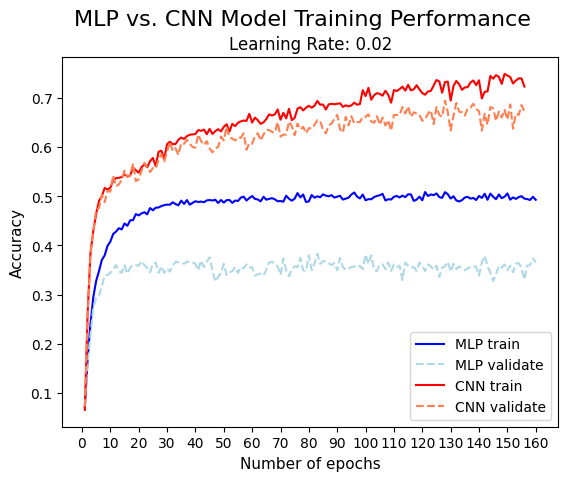

In [408]:
# Plotting accuracy of both models over training epochs
x_MLP = np.arange(10, 10 * (len(MLP_train_accuracies) + 1), 10)
x_CNN = np.arange(10, 10 * (len(trained_CNN_train_accuracies) + 1), 10) # Remove trained_ part if you trained it yourself!

plt.plot(x_MLP, MLP_train_accuracies, color ='blue')
plt.plot(x_MLP, MLP_val_accuracies, color = 'lightblue', linestyle = '--')
plt.plot(x_CNN, trained_CNN_train_accuracies, color = 'red') # Remove trained_ part if you trained it yourself!
plt.plot(x_CNN, trained_CNN_val_accuracies, color = 'coral', linestyle = '--') # Remove trained_ part if you trained it yourself!

plt.legend(['MLP train', 'MLP validate', 'CNN train', 'CNN validate'], loc='lower right')

main_title = 'MLP vs. CNN Model Training Performance'
plt.suptitle(main_title, fontsize=16)

learning_rate_subtitle = 'Learning Rate: 0.02'
plt.title(learning_rate_subtitle, fontsize=12)

plt.xlabel('Number of epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.xticks(np.arange(0, len(x_MLP) * 10 + 1, 100), np.arange(0, len(x_MLP) + 1, 10))

plt.show()

As we can see in the plot above, both the MLP and the CNN rise very rapidly in the beginning. However, the slope starts to gain some curvature at completely different accuracy values for the MLP; The dissociation between the train and validate accuracy of the MLP is indicative of overfitting. There's no further divergence perceived in this plot for later epochs. The CNN accuracy lines for train and validation are more aligned, and only slightly diverge until it is cut off by early stopping mechanisms around 160 epochs. This indicates that there's less overfitting for the CNN model.



> Note: the MLP was cut off earlier by early stopping rule, but we increased the patience argument for the purpose of visualizing both models alongside each other. However, as there's no extreme divergence between epoch 30 and 160, the model likely performs alike to when it would be early stopped with the patience value of 25 as we used for the CNN.



### ***Model evaluation on test sets***
We have only looked at the model's performance on the Quick, Draw! train and validation set so far. Let's evaluate how our baseline MLP and CNN models perform on the Quick, Draw! images we withheld for the test set as well as the Oracle Bone Script test set.

This way, we can investigate both the in-distribution and out-of-distribution generalizabilities of our models, respectively.

In [428]:
# Set both models to evaluation mode, turn of batchnorm and dropout updates.
trained_CNNmodel.eval()
MLPmodel.eval()

print("\033[1m", "When tested on the Quick, Draw! data:","\033[10", "\n")

evaluate_model(trained_CNNmodel, X_train, y_train, QD_test, y_test, n_steps = 1, print_every = 1)

evaluate_model(MLPmodel, X_train, y_train, QD_test, y_test, n_steps = 1, print_every = 1)

print("\033[1m", "When tested on the Oracle Bone Script data:","\033[0m", "\n")

evaluate_model(trained_CNNmodel, X_train, y_train, OB_test, OBy_test, n_steps = 1, print_every = 1)

evaluate_model(MLPmodel, X_train, y_train, OB_test, OBy_test, n_steps = 1, print_every = 1)

 When tested on the Quick, Draw! data: [10 

Accuracy score for train set is 0.6581184056271981 

Accuracy score for validation set is 0.7448367754830113 

Accuracy score for train set is 0.5593493552168816 

Accuracy score for validation set is 0.4290473017988008 

 When tested on the Oracle Bone Script data:  

Accuracy score for train set is 0.6581184056271981 

Accuracy score for validation set is 0.08461538461538462 

Accuracy score for train set is 0.5593493552168816 

Accuracy score for validation set is 0.05384615384615385 



(0.5593493552168816, 0.05384615384615385)

As we can see below, the baseline MLP doesn't seem to generalize very well. It achieves an accuracy of 0.429 on the Quick, Draw! test set and an accuracy of 0.054 (around guessing rate of 1/15 categories = 0.067).

On the other hand, the CNN performs quite well on the Quick, Draw! test data, it manages an accuracy of 0.736. Now, it doesn't seem to do nearly as well on the Oracle Bone Script test data, but that is not a big surprise with out-of-distribution generalization.Our CNN managed to achieve an accuracy of 0.131 (fluctuates per calculation). That's above guess rate! After all, our CNN had not encountered *any* of the Oracle Bone Script images during its training.

Considering that the CNN outperforms our baseline MLP quite a bit, we will focus on diving deeper into analyzing solely the results from the CNN's performance on the Oracle Bone Script images from this stage onwards.


### ***How are the Oracle Bone Scripts classified?***

Let's check out the class probabilities for different test images coming from the Oracle Bone Script dataset and see whether our trained CNN could decipher this ancient form of Chinese characters!

##### ***What do the models see?***
In the code below we can look at specific predictions for images the Oracle Bone Script dataset. As you can see, the CNN has a better idea of what's going on than the MLP. The CNN does tend to have a bias towards identifying rhinoceros, this is likely because of the diversity of the rhinoceros images in the OB dataset. Uncomment the second line to look at some more, randomly selected instances!

Showing the relative predicted class probabilities of image: 124 

 Actual class of image: rhinoceros  

Top figure is CNN, bottom is MLP 



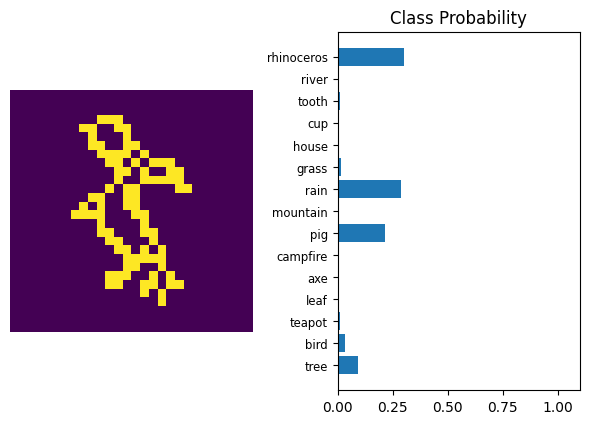

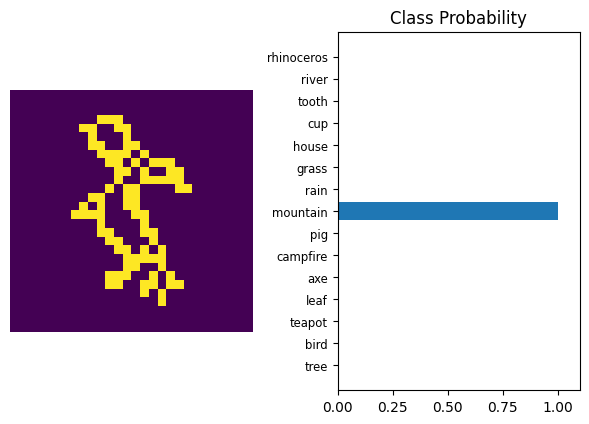

In [444]:
img_test = 124
# img_test = random.randint(0,len(OBy_test)-1)

print("Showing the relative predicted class probabilities of image: " + str(img_test), "\n")
print("\033[1m", "Actual class of image: " + OBcats[int(OBy_test[img_test])],"\033[0m", "\n")
print("Top figure is CNN, bottom is MLP", "\n")

# get prediction for the image from the test dataset
# test_model(CNNmodel, X_valOB[img_test])
test_model(trained_CNNmodel, OBX_test[img_test])
test_model(MLPmodel, OBX_test[img_test])

##### ***Oracle Bone Scripts that resemble doodles***

How did the CNN classify Oracle Bone Script images that resemble the doodles?

Although bird was among the top 6 predicted category for the example of Bone Oracle Script image for bird. However, for the example of Bone Oracle Script image for axe, it was not among the top 6 predicted.



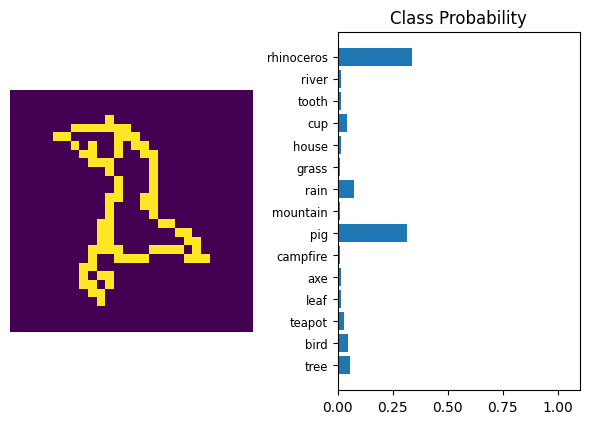

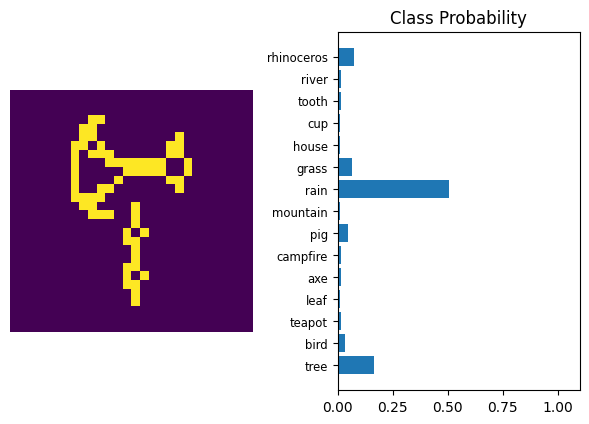

In [436]:
# get prediction for bird and axe from OB
test_model(trained_CNNmodel, OBX_test[23]) #bird
test_model(trained_CNNmodel, OBX_test[56]) #axe

##### ***Exploring potential reasons for distribution differences***

**Socio-historical differences**

There are various reasons why the distributions of the two datasets differ, including socio-historical ones (e.g. "fire hydrant", "stove", or "car" did not exist in China 3,000 years ago). In the subset of images we used, man-made objects such as "teapot", "cup" or "house" could look very different now compared to in China 3,000 years ago. Furthermore, Quick, Draw! images were collected from across the world while the Oracle Bone Script images were specific to certain regions in China. Therefore, how a prototypical "bird" or "tree" looks as well as the variance of prototypical depictions may differ between the two datasets.

**Differences in methods and purpose**

Some of the Oracle Bone Script may be motivated by the objects they refer to, such that they resemble doodles. Nevertheless, missclassifications could be exacerbated by mismatches between *how* the images were generated for the two datasets. Specifically, there are significant and relevant differences between the the methods with which the images were collected for the two datasets. This may contribute to differences between either datasets; Not just the amount of variance between the two dataset distributions (as we saw when looking at the heatmaps), but also the shapes of their respective noise distributions.

The Quick, Draw! dataset, images were collected from participants who had a time limit of 20 seconds maximum to draw a doodle representing the cateory (on their laptops or tablets). Therefore, the Quick, Draw! dataset contains images that can be incomplete, not match the category, or not actually doodles (e.g. writing "cup" in English when prompted by the category "cup"), contributing to noisy data.

On the other hand, Oracle Bone Scripts were found carved on animal bones and turtle shells. The images we used were thus lifted from these carvings. Given the difficulty and intricacies of the task, the Oracle Bone Script representations have a higher bias for use of lines over large curves or shapes. For instance, there are very few circular or spherical shapes used in the Oracle Bone Script dataset while there is no such bias in the Quick, Draw! dataset. In fact, for the Quick, Draw! images, participants may even prefer large shapes over linear details for the speed and ease of representation.

Lastly, the Quick, Draw! game format encourages participants to prioritize representing the most salient features of the category object whereas in developing a writing system, there are likely aesthetic and practical considerions, such as form or simplicity, that may have been prioritized. Parallel to the development ofo the writing system, many of the carved Oracle Bone objects were used ceremononiously. Therefore, there is a high degree of symbolism in the Oracle Bone Scrips that is not present in the Quick, Draw! dataset (this is explored in more depth below!) All of these considerations contributes to differences such as higher detail and intricacies in the Oracle Bone Scripts compared to the doodles.

The distribution underlying the two datatsets therefore differ due to these motivation and practical factors, in addition to the sociohistorical factors mentioned above. By going back to the visualizations of the two datasets, many of these differences can be spotted!

**Let's look at some examples**

The example below helps illustrate differences in depiction between the datasets, despite both aiming to visually represent "pig". In the Quick, Draw! datasets, many participants drew the face of the pig while in the Oracle Bone Scripts, the entire body of the animal was chosen to be depicted from profile view.

The upper half contains QD images, the bottom half OB images: 



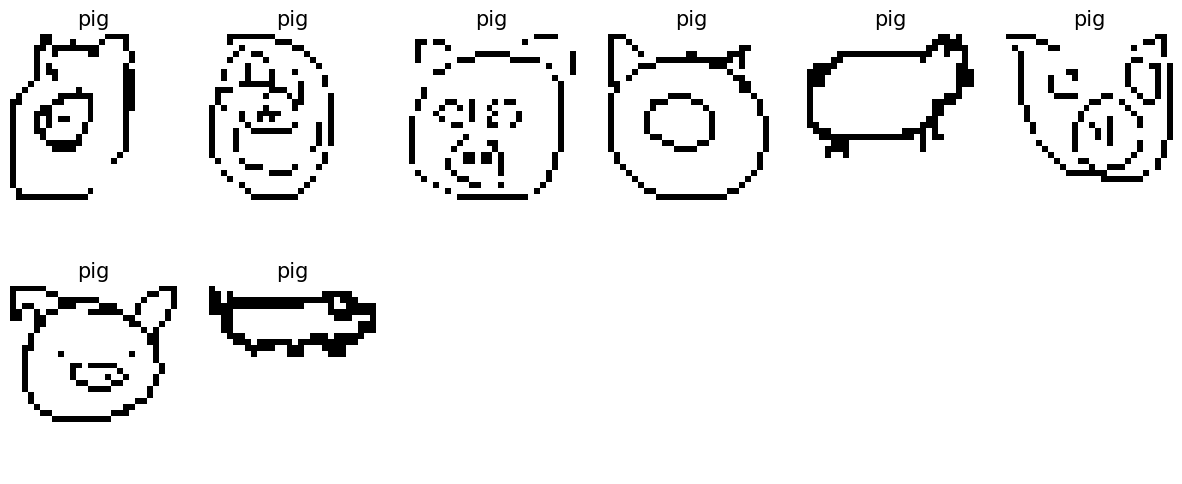

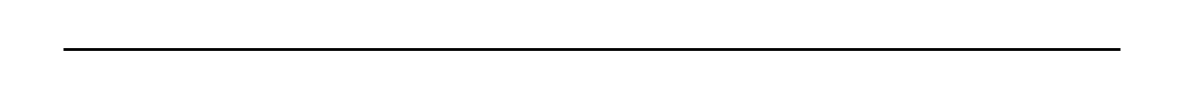

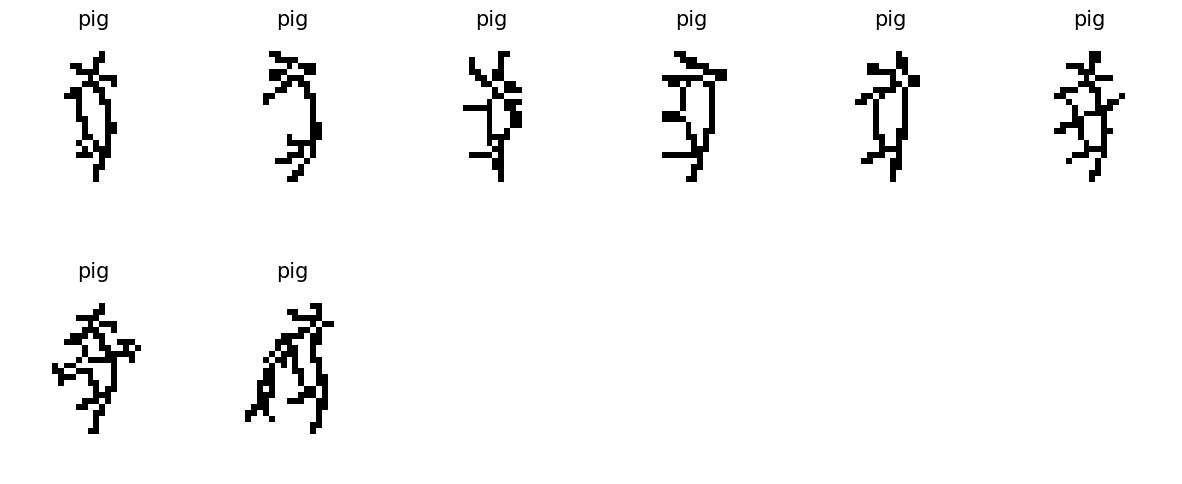

In [441]:
# all images in OB dataset for the category "pig"

show_cat = 'pig' # Example category

print("The upper half contains QD images, the bottom half OB images:", "\n")
wdth = show_QD_img(show_cat)

fig, ax = plt.subplots(figsize=(wdth, 1))

# Plot a horizontal line using ax.hlines
ax.hlines(y=0, xmin=0, xmax=1, color='black', linewidth=2)

# Turn off the y-axis
ax.get_yaxis().set_visible(False)
ax.axis('off')

# Display the figure
plt.show()

# Show the Oracle Bone Script images
_ = show_OB_img(show_cat)

Another similar example of this is the category "tooth".

In the Quick, Draw! dataset, participants tend to draw the single tooth while in the Oracle Bone Script, the entire mouth is portrayed.

The upper half contains QD images, the bottom half OB images: 



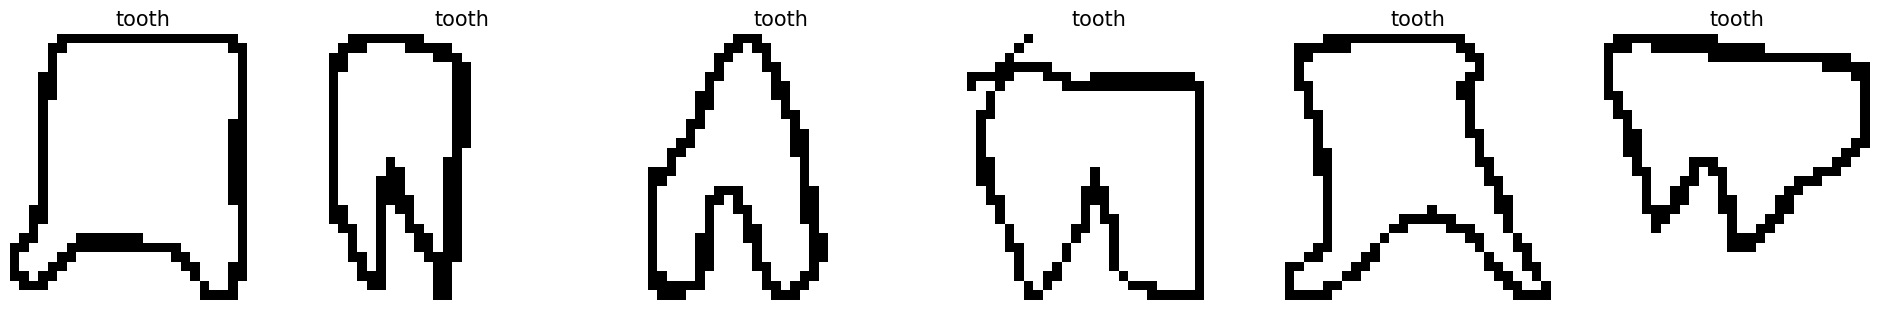

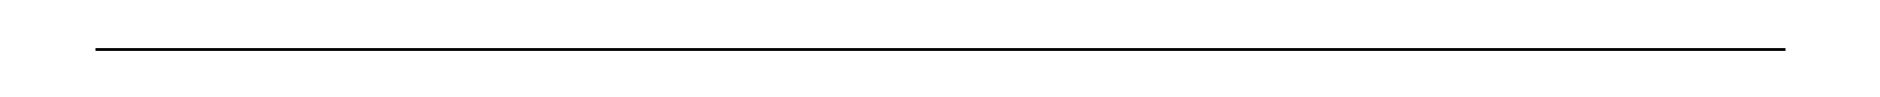

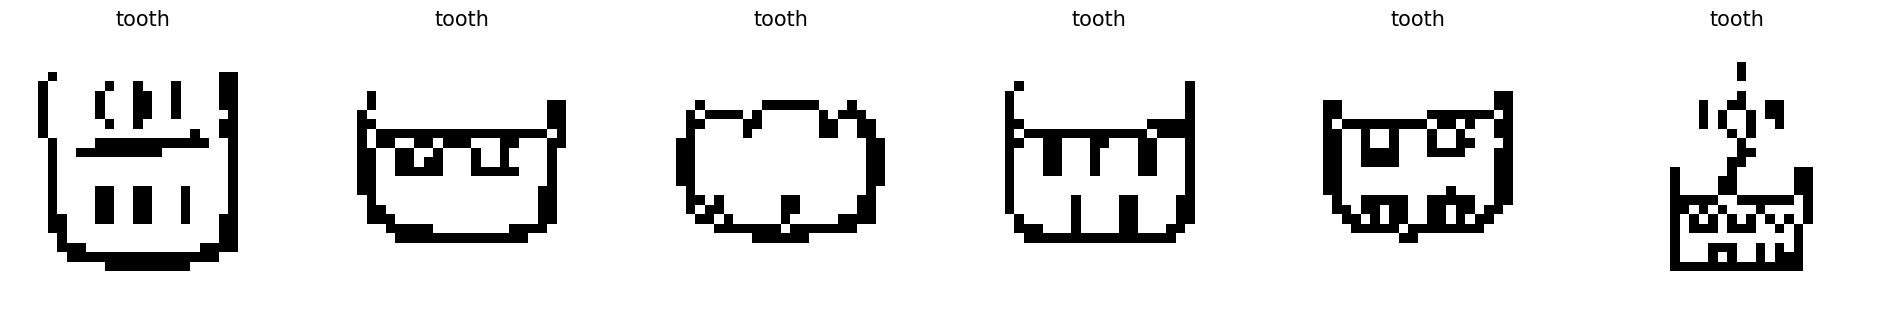

In [440]:
# all images in OB dataset for the category "tooth"

show_cat = 'tooth' # Example category

print("The upper half contains QD images, the bottom half OB images:", "\n")
wdth = show_QD_img(show_cat)

fig, ax = plt.subplots(figsize=(wdth, 1))

# Plot a horizontal line using ax.hlines
ax.hlines(y=0, xmin=0, xmax=1, color='black', linewidth=2)

# Turn off the y-axis
ax.get_yaxis().set_visible(False)
ax.axis('off')

# Display the figure
plt.show()

# Show the Oracle Bone Script images
_ = show_OB_img(show_cat)

##### ***Symbolism in Oracle Bone Script***

Lastly, it is important to recognize that the Oracle Bone Scripts are *symbolic* in addition to representing objects visually. This further distinguishes the distributions underlying the two datasets from one another.

A neat example is the modern Chinese character 「家」for "household" or "home" , which evolved from the Oracle Bone Script depictions below. The modern character draws from the Oracle Bone Script image of a roof over a pig. Thus Oracle Bone Script capture also symbolic meaning of what makes up an object such as"household". This differs from the Quick, Draw doodles, which consists of more literal interpretations of categories (the definition of "doodle" is "a rough drawing made absent-mindedly").

This could have also further contributed to difficulties generalizing the CNN trained on Quick, Draw! images to the out-of-distribution Oracle Bone Scripts images.

As can be seen below, the CNN seems to pick up on the pig below the roof in the Oracle Bone depiction of "house"!

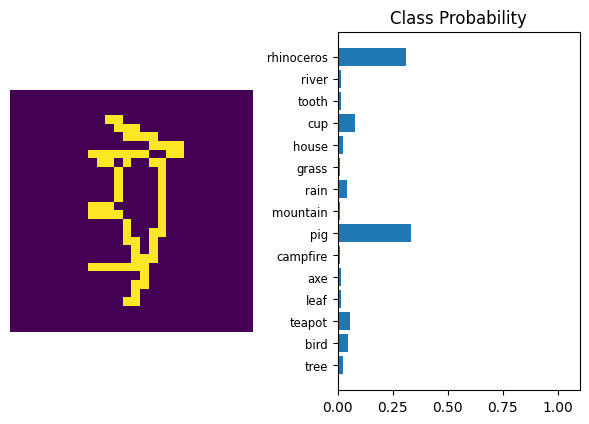

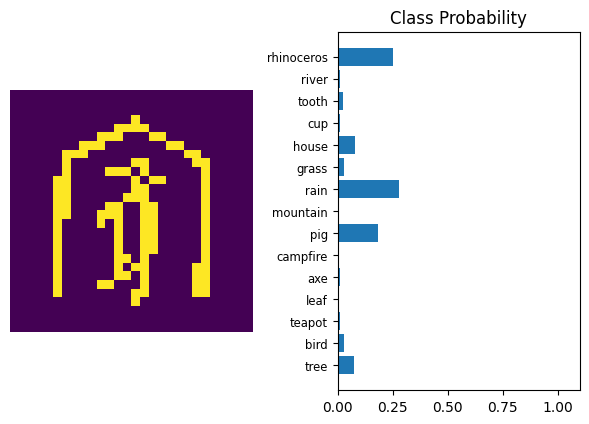

In [442]:
# Acquire predictions for pig and house.
test_model(trained_CNNmodel, OBX_test[74]) # pig example
test_model(trained_CNNmodel, OBX_test[102]) # house example

## **Discussion and Concluding Remarks** ##

###***Summary***###
What have we discovered?

1. We have demonstrated various dat processing, image processing as well as data augmentation techniques.

2. We built our own MLP and CNN, including customizing the model architectures, and trained both models.

3. We evaluated and compared the two models, finding that the CNN managed OOD generalization somewhat, reaching an accuracy above guessing rate on the Oracle Bone Script test set!

4. We learned how distribution differences between train and test sets, such as degree of variance and noise, can affect OOD generalization significantly. It is therefore important to consider the validity of the Independent and Identically Distributed (i.i.d.) assumption (Gwon & Yoo, 2023), especially when training models for the real world.

5. We delved into analyzing the results of the OOD generalization and explored possible reasons for our findings, taking into account various aspects of distribution differences between the two datasets.

6. We built something cool!

#### **Limitations and ideas for improvement**


1.   **Accounting for both literal and symbolic representations:** Different criteria when matching OB images to QD categories (e.g. taking into account symbolic meaning).
2.   **Custom training set:** Incorporate information from the evolution of Chinese characters to explore "deciphering" (Wang et al., 2022). This could be done by include both doodles and modern Chinese characters to create a custom training set so that it can use feature patterns extracted from both for OOD generalization.
3.   **Try OOD specific techniques:** Although we did augment the QD dataset to try to improve our models’ performance on the OB dataset , experimentation with more advanced and OOD generalization specific techniques such as manipulation of feature statistics (Li et al., 2022) and novel data augmentation techniques (Hendrycks et al., 2021; Gwon & Yoo, 2023) could improve the model's performance on the OB dataset.


## **References**

*   Cheng, S., Ren, Y., & Yang, Y. (2022).SSR-GNNs: Stroke-based Sketch Representation with Graph Neural Networks. *2022 IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (CVPRW)*. https://doi.org/10.1109/cvprw56347.2022.00561

*   Gwon, K., & Yoo, J. (2023). Out-of-Distribution (OOD) detection and generalization improved by augmenting adversarial mixup samples. *Electronics, 12(6),* 1421. https://doi.org/10.3390/electronics12061421

*   Hendrycks, D., Basart, S., Mu, N., Kadavath, S., Wang, F., Dorundo, E., ... & Gilmer, J. (2021). The many faces of robustness: A critical analysis of out-of-distribution generalization. *In Proceedings of the IEEE/CVF International Conference on Computer Vision (pp. 8340-8349).* https://arxiv.org/abs/2006.16241

*   Li, X., Dai, Y., Ge, Y., Liu, J., Shan, Y., & Duan, L. Y. (2022). Uncertainty modeling for out-of-distribution generalization. arXiv preprint arXiv:2202.03958. https://arxiv.org/abs/2202.03958

*   Liu, J. (2023). Towards Out-Of-Distribution Generalization: A Survey. arXiv.org. https://arxiv.org/abs/2108.13624

*   Wang, M., Cai, Y., Gao, L., Feng, R., Jiao, Q., Ma, X., & Jia, Y. (2022). Study on the evolution of Chinese characters based on few-shot learning: From oracle bone inscriptions to regular script. *PLOS ONE, 17(8),* e0272974. https://doi.org/10.1371/journal.pone.0272974

*   Yang, J. (2021, October 21). Generalized Out-of-Distribution Detection: A Survey. arXiv.org. https://arxiv.org/abs/2110.11334

*   Zhang, X., Cui, P., Xu, R., Zhou, L., He, Y., & Shen, Z. (2021). Deep stable learning for out-of-distribution generalization. *In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 5372-5382).* https://arxiv.org/abs/2104.07876






